### Notebook associated with and submitted to the Kaggle comeptition: https://www.kaggle.com/competitions/widsdatathon2022 

# Data Dictionary

**id**: building id    

**Year_Factor**: anonymized year in which the weather and energy usage factors were observed

**State_Factor**: anonymized state in which the building is located

**building_class**: building classification

**facility_type**: building usage type

**floor_area**: floor area (in square feet) of the building

**year_built**: year in which the building was constructed

**energy_star_rating**: the energy star rating of the building

**ELEVATION**: elevation of the building location

**january_min_temp**: minimum temperature in January (in Fahrenheit) at the location of the building

**january_avg_temp**: average temperature in January (in Fahrenheit) at the location of the building

**january_max_temp**: maximum temperature in January (in Fahrenheit) at the location of the building

**cooling_degree_days**: cooling degree day for a given day is the number of degrees where the daily average temperature exceeds 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.

**heating_degree_days**: heating degree day for a given day is the number of degrees where the daily average temperature falls under 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.

**precipitation_inches**: annual precipitation in inches at the location of the building

**snowfall_inches**: annual snowfall in inches at the location of the building

**snowdepth_inches**: annual snow depth in inches at the location of the building

**avg_temp**: average temperature over a year at the location of the building

**days_below_30F**: total number of days below 30 degrees Fahrenheit at the location of the building

**days_below_20F**: total number of days below 20 degrees Fahrenheit at the location of the building

**days_below_10F**: total number of days below 10 degrees Fahrenheit at the location of the building

**days_below_0F**: total number of days below 0 degrees Fahrenheit at the location of the building

**days_above_80F**: total number of days above 80 degrees Fahrenheit at the location of the building

**days_above_90F**: total number of days above 90 degrees Fahrenheit at the location of the building

**days_above_100F**: total number of days above 100 degrees Fahrenheit at the location of the building

**days_above_110F**: total number of days above 110 degrees Fahrenheit at the location of the building

**direction_max_wind_speed**: wind direction for maximum wind speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).

**direction_peak_wind_speed**: wind direction for peak wind gust speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).

**max_wind_speed**: maximum wind speed at the location of the building

**days_with_fog**: number of days with fog at the location of the building

**Target**

**site_eui**: Site Energy Usage Intensity is the amount of heat and electricity consumed by a building as reflected in utility bills

# Objective
Predict building energy consumption (Site EUI) using variables that describe  characteristics of the building and weather data. Accurate predictions of energy consumption can help policymakers target retrofitting efforts to maximize emissions reductions. 

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor, plot_importance

In [2]:
train = pd.read_csv('../input/widsdatathon2022/train.csv')
test = pd.read_csv('../input/widsdatathon2022/test.csv')

# **Exploratory Data Analysis**

In [3]:
print(train.shape)
print(test.shape)

(75757, 64)
(9705, 63)


In [4]:
train.head()

Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   
2            1      State_1     Commercial   
3            1      State_1     Commercial   
4            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market     61242.0      1942.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                       Retail_Enclosed_mall    280025.0      1951.0   
3                  Education_Other_classroom     55325.0      1980.0   
4                  Warehouse_Nonrefrigerated     66000.0      1985.0   

   energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  \
0                11.0        2.4                36              50.5   
1                45.0        1.8                36              50.5   
2                97.0        1.8                36              50.5   
3                46.0        1.8                36              50.5   
4               100.0        2.4                36              50.5   

   january_max_temp  february_min_temp  february_avg_temp  february_max_temp  \
0                68                 35          50.589286                 73   
1                68                 35          50.589286                 73   
2                68                 35          50.589286                 73   
3                68                 35          50.589286                 73   
4                68                 35          50.589286                 73   

   march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
0              40       53.693548              80              41   
1              40       53.693548              80              41   
2              40       53.693548              80              41   
3              40       53.693548              80              41   
4              40       53.693548              80              41   

   april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  may_max_temp  \
0            55.5              78            46     56.854839            84   
1            55.5              78            46     56.854839            84   
2            55.5              78            46     56.854839            84   
3            55.5              78            46     56.854839            84   
4            55.5              78            46     56.854839            84   

   june_min_temp  june_avg_temp  june_max_temp  july_min_temp  july_avg_temp  \
0             50           60.5             90             52      62.725806   
1             50           60.5             90             52      62.725806   
2             50           60.5             90             52      62.725806   
3             50           60.5             90             52      62.725806   
4             50           60.5             90             52      62.725806   

   july_max_temp  august_min_temp  august_avg_temp  august_max_temp  \
0             84               52         62.16129               85   
1             84               52         62.16129               85   
2             84               52         62.16129               85   
3             84               52         62.16129               85   
4             84               52         62.16129               85   

   september_min_temp  september_avg_temp  september_max_temp  \
0                  52               64.65                  90   
1                  52               64.65                  90   
2                  52               64.65                  90   
3                  52               64.65                  90   
4                  52               64.65                  90   

   october_min_temp  october_avg_temp  october_max_temp  november_min_temp  \
0                47         63.016129                83                 43   
1                47         63.016

In [5]:
# For simplification, make sure all column names are lower case
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()

In [6]:
train.describe()

year_factor    floor_area    year_built  energy_star_rating  \
count  75757.000000  7.575700e+04  73920.000000        49048.000000   
mean       4.367755  1.659839e+05   1952.306764           61.048605   
std        1.471441  2.468758e+05     37.053619           28.663683   
min        1.000000  9.430000e+02      0.000000            0.000000   
25%        3.000000  6.237900e+04   1927.000000           40.000000   
50%        5.000000  9.136700e+04   1951.000000           67.000000   
75%        6.000000  1.660000e+05   1977.000000           85.000000   
max        6.000000  6.385382e+06   2015.000000          100.000000   

          elevation  january_min_temp  january_avg_temp  january_max_temp  \
count  75757.000000      75757.000000      75757.000000      75757.000000   
mean      39.506323         11.432343         34.310468         59.054952   
std       60.656596          9.381027          6.996108          5.355458   
min       -6.400000        -19.000000         10.806452         42.000000   
25%       11.900000          6.000000         29.827586         56.000000   
50%       25.000000         11.000000         34.451613         59.000000   
75%       42.700000         13.000000         37.322581         62.000000   
max     1924.500000         49.000000         64.758065         91.000000   

       february_min_temp  february_avg_temp  february_max_temp  \
count       75757.000000       75757.000000       75757.000000   
mean           11.720567          35.526837          58.486278   
std            12.577272           8.866697           8.414611   
min           -13.000000          13.250000          38.000000   
25%             2.000000          31.625000          55.000000   
50%             9.000000          34.107143          61.000000   
75%            20.000000          40.879310          62.000000   
max            48.000000          65.107143          89.000000   

       march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
count    75757.000000    75757.000000    75757.000000    75757.000000   
mean        21.606281       44.469292       70.897831       32.037171   
std         10.004303        6.657142        7.680982        5.577279   
min         -9.000000       25.854839       53.000000       15.000000   
25%         13.000000       38.096774       62.000000       26.000000   
50%         25.000000       44.516129       71.000000       32.000000   
75%         27.000000       49.354839       78.000000       37.000000   
max         52.000000       69.758065       95.000000       52.000000   

       april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  \
count    75757.000000    75757.000000  75757.000000  75757.000000   
mean        53.784863       82.661932     44.706179     63.742547   
std          2.500473        4.101028      4.200319      2.792919   
min         40.280000       62.000000     23.000000     46.950000   
25%         52.333333       80.000000     42.000000     62.790323   
50%         53.333333       82.000000     45.000000     62.887097   
75%         54.766667       87.000000     49.000000     65.096774   
max         74.500000      104.000000     58.000000     82.112903   

       may_max_temp  june_min_temp  june_avg_temp  june_max_temp  \
count  75757.000000   75757.000000   75757.000000   75757.000000   
mean      88.987856      51.131763      71.066384      91.400280   
std        2.864669       3.415926       2.861681       3.604068   
min       64.000000      30.000000      54.100000      67.000000   
25%       88.000000      50.000000      70.983333      89.000000   
50%       89.000000      52.000000      72.250000      90.000000   
75%       91.000000      53.000000      72.450000      94.000000   
max      112.000000      68.000000      89.550000     119.000000   

       july_min_temp  july_avg_temp  july_max_temp  august_min_temp  \
count   75757.000000   75757.000000   75757.000000     75757.000000   
mean       60.571604      76.596879      95.

In [7]:
train.info()
train.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year_factor                75757 non-null  int64  
 1   state_factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   elevation                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

int64      37
float64    24
object      3
dtype: int64

There is mostly numerical data but 3 categorical columns that will need to be encoded.

In [8]:
# check if there are duplicates in id 
print(train.id.nunique())
train.id.duplicated().any() 

75757


False

In [9]:
# check if there are duplicates in id 
test.id.duplicated().any() 

False

In [10]:
#Drop id column but keep test id for later
test_id = test.loc[:, ['id']] 
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

**Site Energy Usage Intensity**

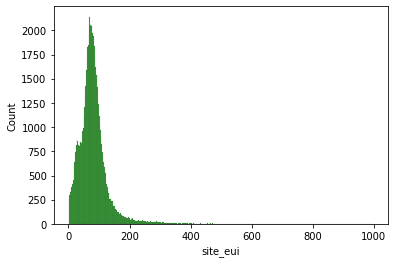

In [11]:
sns.histplot(train, x='site_eui', color='g');

**Year factor** 

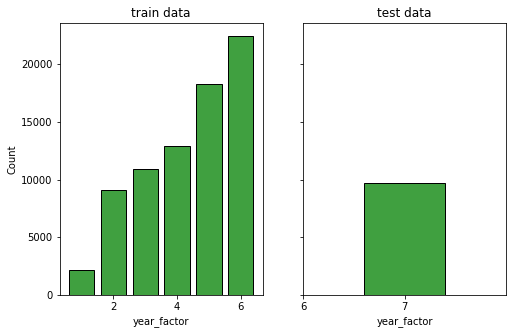

In [12]:
fig,axes = plt.subplots(1,2, figsize=(8,5), sharey=True) 

sns.histplot(train, x='year_factor', discrete=True, shrink=.8, ax=axes[0], color='g').set_title('train data')
sns.histplot(test, x='year_factor', discrete=True, shrink=.8, ax=axes[1], color='g').set_title('test data')
plt.xlim([6, 8]); plt.xticks(np.arange(6, 8, step=1));

The problem with the year_factor is that all train data is from years 1 to 6, whereas the test data is from year 7. Check distribution to see if site_eui appears to differ between years.

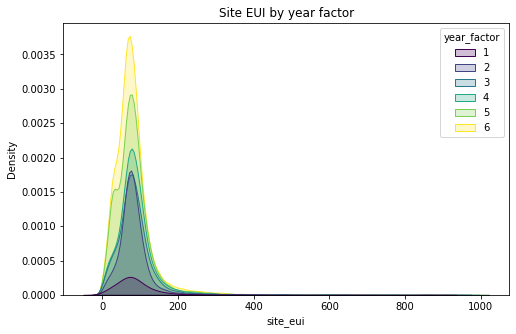

In [13]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=train, x="site_eui", hue='year_factor', fill=True, palette='viridis')  
plt.title('Site EUI by year factor');

Seems like the site_eui is relatively evenly distributed across years, indicating the years do not vary greatly in energy usage. We'll drop the variable for now. 

**State factor**

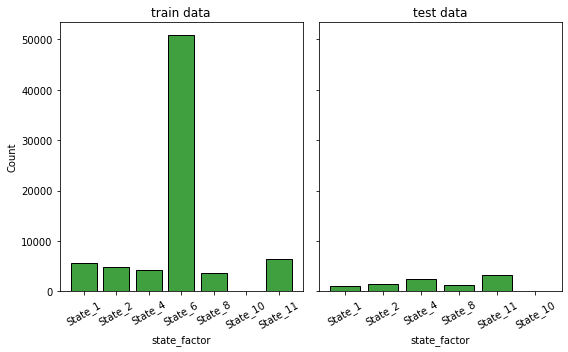

In [14]:
fig,axes = plt.subplots(1,2, figsize=(8,5), sharey=True)
sns.histplot(train, x='state_factor', discrete=True, shrink=.8, ax=axes[0], color='g').set_title('train data')
sns.histplot(test, x='state_factor', discrete=True, shrink=.8, ax=axes[1], color='g').set_title('test data')

for a in axes.flatten():
    plt.sca(a)
    plt.xticks(rotation = 30)

fig.tight_layout()

Most train data consists of data from State 6, whereas there is no data from State 6 in the test data. 

state_factor
State_1     62.20
State_10    68.60
State_11    53.99
State_2     77.87
State_4     95.20
State_6     87.48
State_8     87.42
Name: site_eui, dtype: float64


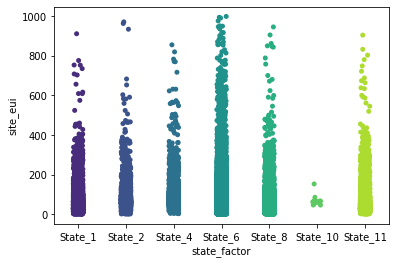

In [15]:
sns.stripplot(x='state_factor', y='site_eui', data=train, jitter=True, palette='viridis')
print( round(train.groupby('state_factor')['site_eui'].mean() ,2) )

**Building class**

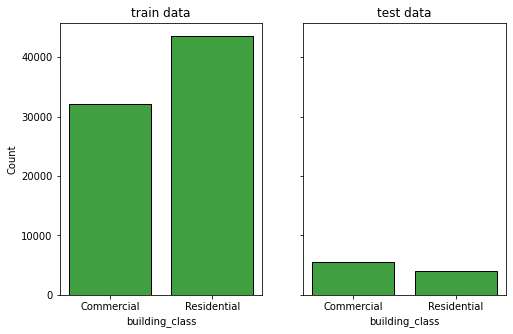

In [16]:
fig, axes = plt.subplots(1,2, figsize=(8,5), sharey=True)
sns.histplot(train, x='building_class', discrete=True, shrink=.8, ax=axes[0], color='g').set_title('train data')
sns.histplot(test, x='building_class', discrete=True, shrink=.8, ax=axes[1], color='g').set_title('test data');

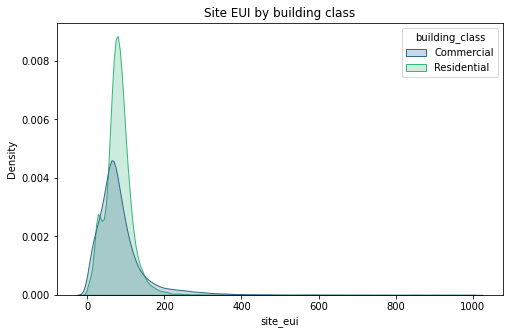

In [17]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=train, x="site_eui", hue='building_class', fill=True, palette='viridis')
plt.title('Site EUI by building class');

building_class
Commercial     85.76
Residential    80.24
Name: site_eui, dtype: float64


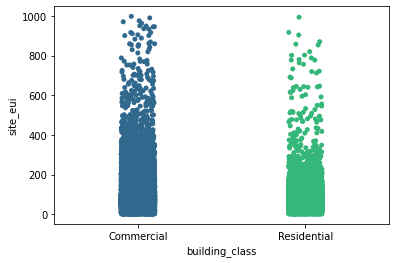

In [18]:
sns.stripplot(x='building_class', y='site_eui', data=train, jitter=True, palette='viridis')
print( round(train.groupby('building_class')['site_eui'].mean() ,2) )

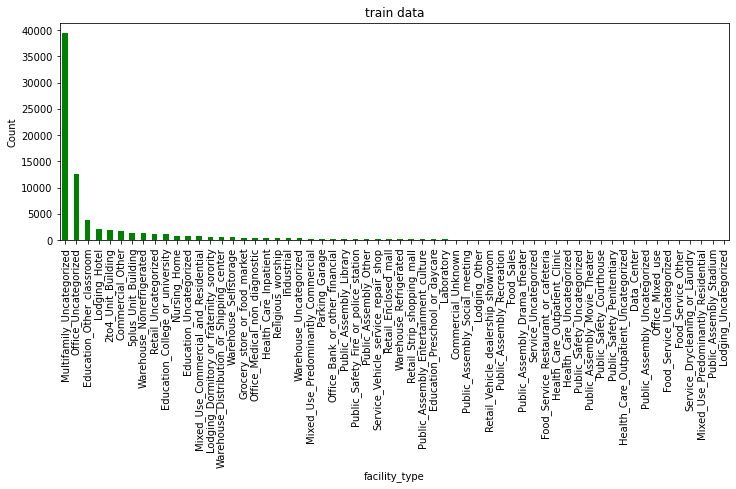

In [19]:
train.groupby('facility_type').size().sort_values(ascending=False).plot(kind='bar', figsize=(12, 4), color='g')
plt.ylabel('Count')
plt.title('train data');

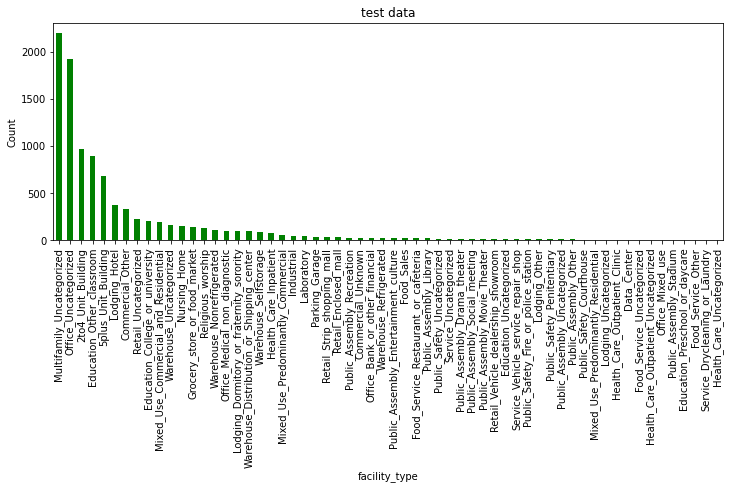

In [20]:
test.groupby('facility_type').size().sort_values(ascending=False).plot(kind='bar', figsize=(12, 4), color='g')
plt.ylabel('Count')
plt.title('test data');

There are many facility types. However, in both train and test set the two most frequent facility types are Multifamily_uncategorized and Office_uncategorized. 

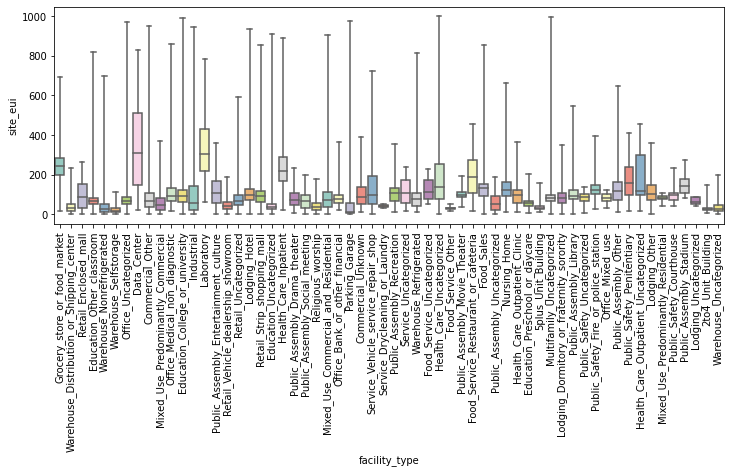

In [21]:
plt.figure(figsize=(12,4)) 
sns.boxplot(data=train, x='facility_type', whis=np.inf, y='site_eui', palette='Set3')
plt.xticks(rotation=90);

**Floor area**

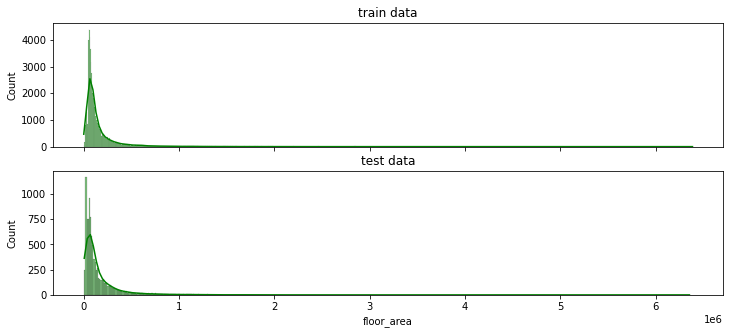

In [22]:
fig,axes = plt.subplots(2,1, figsize=(12,5), sharex=True)
sns.histplot(train, x='floor_area', ax=axes[0], kde=True, color='g').set_title('train data')
sns.histplot(test, x='floor_area', ax=axes[1], kde=True, color='g').set_title('test data');

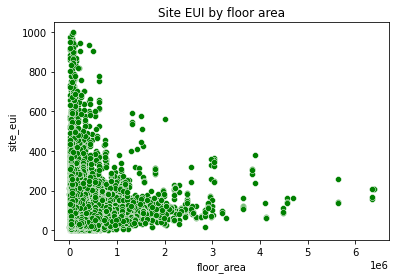

In [23]:
sns.scatterplot(data=train, x='floor_area', y='site_eui', color='g').set_title('Site EUI by floor area');
#sns.regplot(x='floor_area', y='site_eui', data=train, ci=None, robust=True, x_jitter=.2, marker='.', color='g').set_title('Site EUI by floor area');

**Year built**

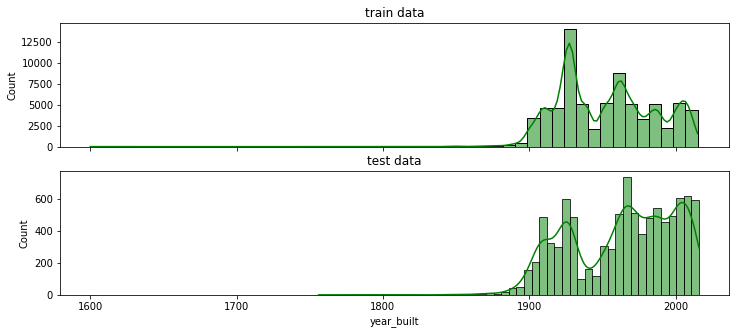

In [24]:
# for plotting, ignore NA for now
fig,axes = plt.subplots(2,1, figsize=(12,5), sharex=True)
sns.histplot(data=train[train['year_built'] != 0], x='year_built', ax=axes[0], bins=50, kde=True, color='g').set_title('train data')
sns.histplot(data=test[test['year_built'] != 0], x='year_built', ax=axes[1], bins=50, kde=True, color='g').set_title('test data');

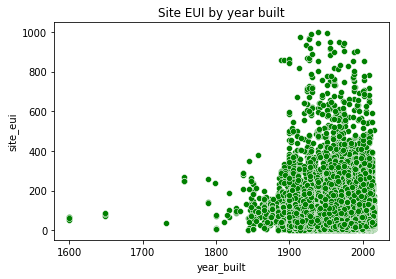

In [25]:
sns.scatterplot(data=train[train['year_built'] != 0], x='year_built', y='site_eui', color='g').set_title('Site EUI by year built');

Most buildings appear to be built after 1850.

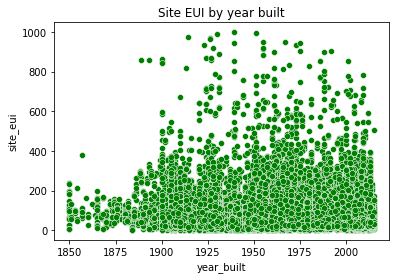

In [26]:
sns.scatterplot(data=train.loc[train['year_built'] >= 1850], x='year_built', y='site_eui', color='g').set_title('Site EUI by year built');

**Energy star rating**

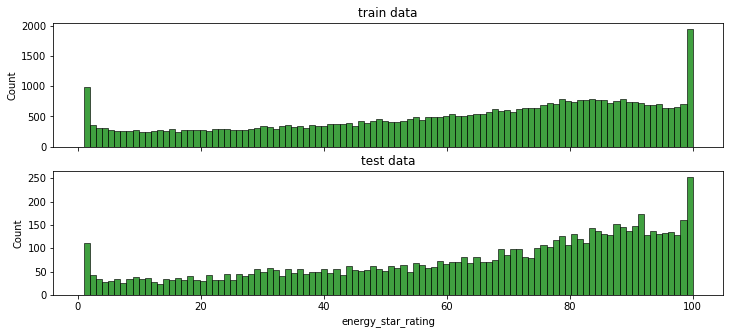

In [27]:
fig,axes = plt.subplots(2,1, figsize=(12,5), sharex=True)
sns.histplot(data=train[train['energy_star_rating'] != 0], x='energy_star_rating', ax=axes[0], bins=100, color='g').set_title('train data')
sns.histplot(data=test[test['energy_star_rating'] != 0], x='energy_star_rating', ax=axes[1], bins=100, color='g').set_title('test data');

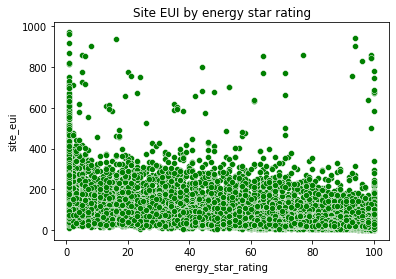

In [28]:
sns.scatterplot(data=train[train['energy_star_rating'] != 0], x='energy_star_rating', y='site_eui', color='g').set_title('Site EUI by energy star rating');

It seems like higher energy star ratings are associated with less energy use. However, some buldings with high energy star ratings still appear to have high energy consumption. Will look into correlations below. 

**Elevation**

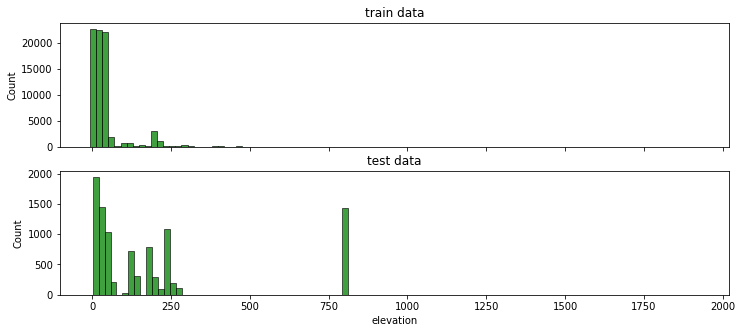

In [29]:
fig,axes = plt.subplots(2,1, figsize=(12,5), sharex=True)
sns.histplot(data=train, x='elevation', ax=axes[0], bins=100, color='g').set_title('train data')
sns.histplot(data=test, x='elevation', ax=axes[1], color='g').set_title('test data');

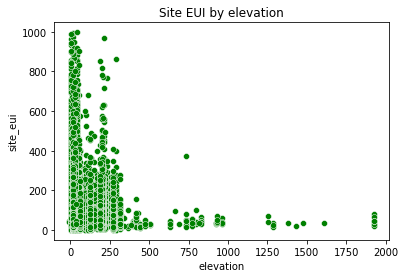

In [30]:
sns.scatterplot(data=train, x='elevation', y='site_eui', color='g').set_title('Site EUI by elevation');

In [31]:
# checking highest absolute correlations with energy usage
train.corr()['site_eui'].sort_values(key=abs, ascending=False)[:5]

site_eui              1.000000
energy_star_rating   -0.511012
january_min_temp     -0.179190
january_avg_temp     -0.167982
snowfall_inches       0.157284
Name: site_eui, dtype: float64

There is only one correlation of note, a "moderate" correlation between energy usage and energy star rating, as previously presumed. Other temperature-related corelation coefficients are < |.2|.

Explore correlations between numerical features other than monthly temperature. 

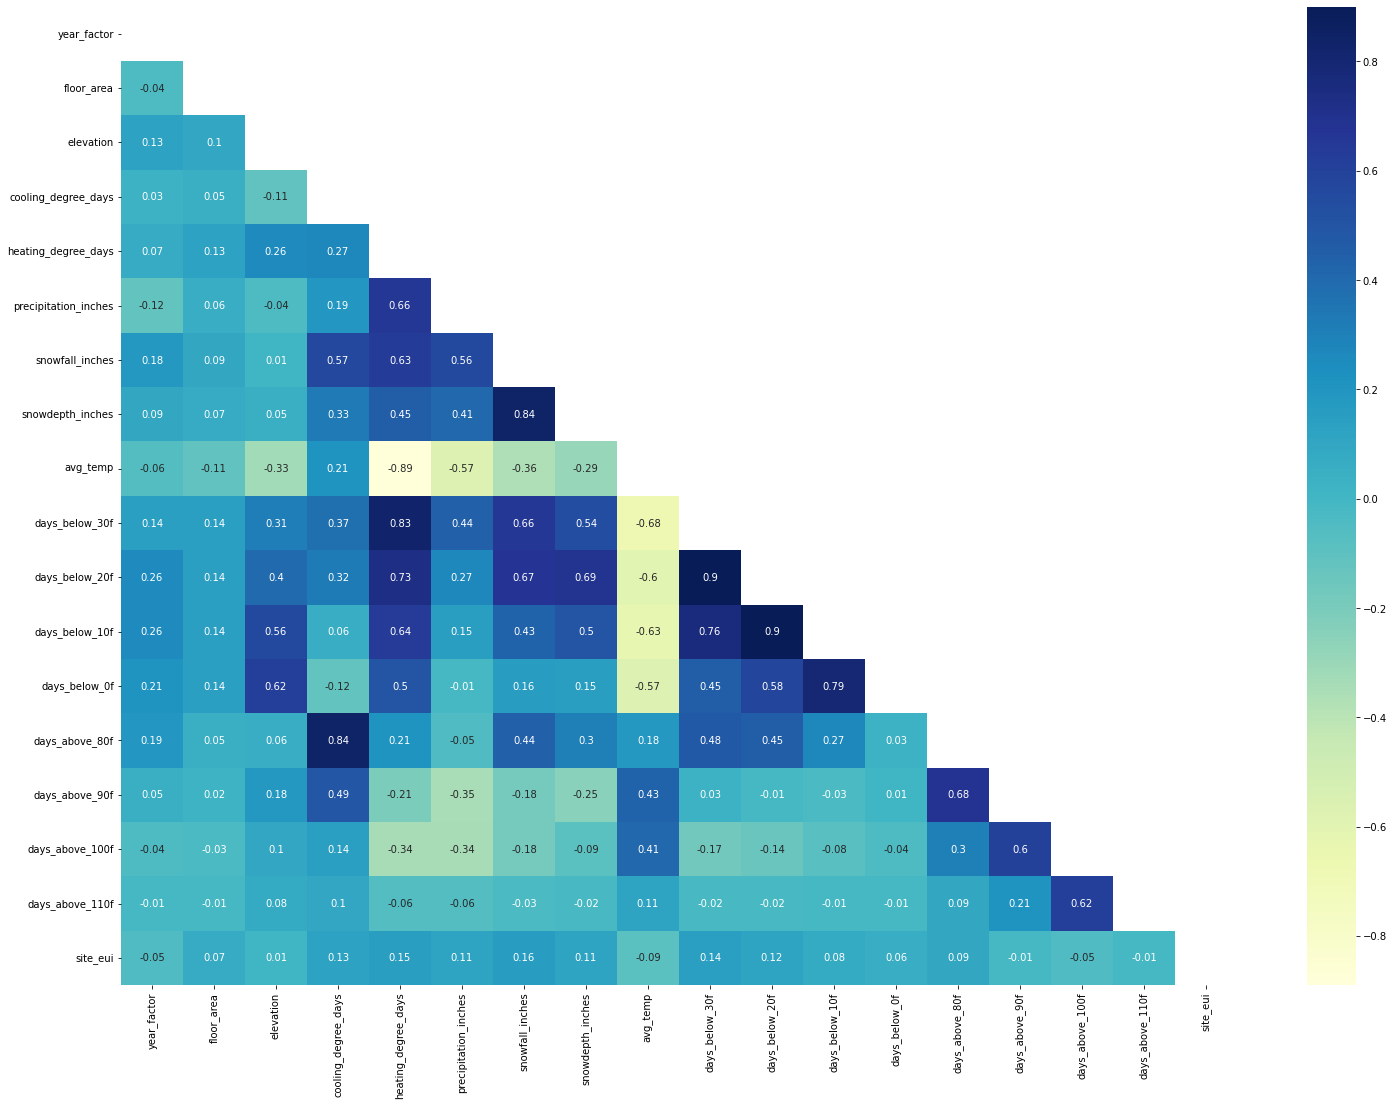

In [32]:
nums_df = train.drop([col for col in train.loc[:, 'january_min_temp':'december_max_temp'] if '_temp' in col], axis=1, inplace=False)
nums_df = nums_df.dropna(axis=1)  # ignoring cols with nan for now 

corr = nums_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize=(25,18))
sns.heatmap(np.round(corr, 2), mask=mask, annot=True, fmt='g', cmap='YlGnBu');  

**Monthly temperature-related metrics**

In [33]:
temp_df = train.loc[:, 'january_min_temp':'december_max_temp']
temp_df['site_eui'] = train['site_eui']

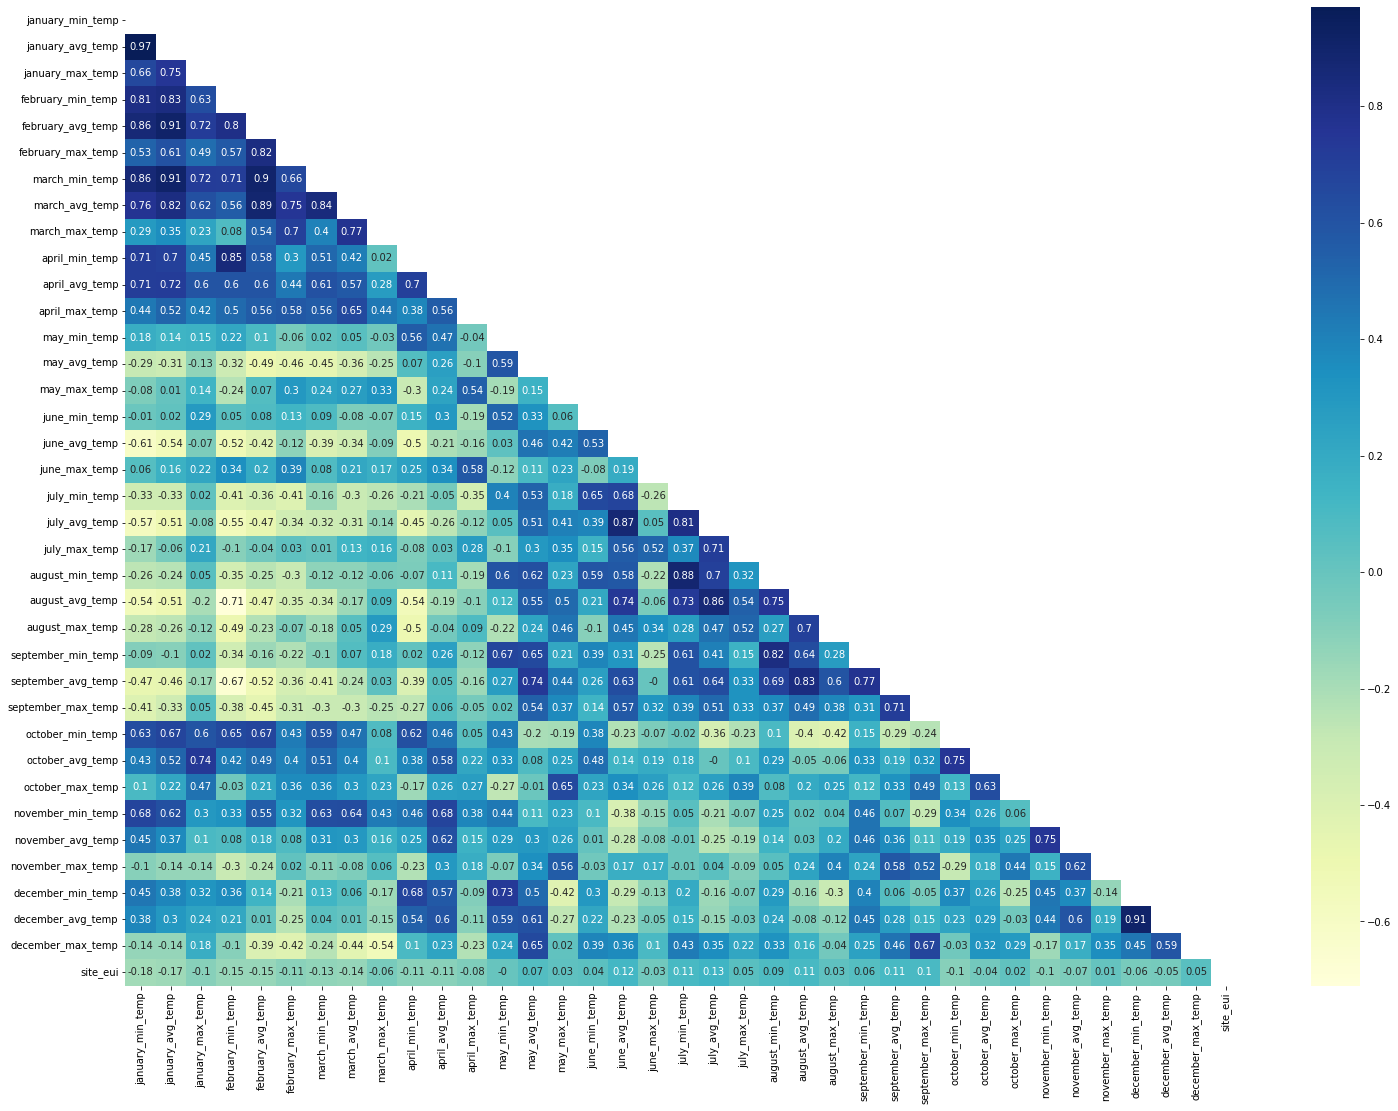

In [34]:
corr = temp_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize=(25,18))
sns.heatmap(np.round(corr, 2), mask=mask, annot=True, fmt='g', cmap='YlGnBu');  

As presumed, temperatures within different metrics (avg, min, max) for each month are often correlated. Similarly, months within seasons (winter, e.g. January and February) are often positively correlated but negatively correlated with months of opposing seasons (e.g. January and August). 

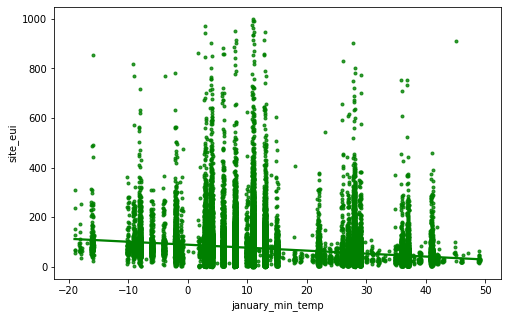

Average january_min_temp   11.43


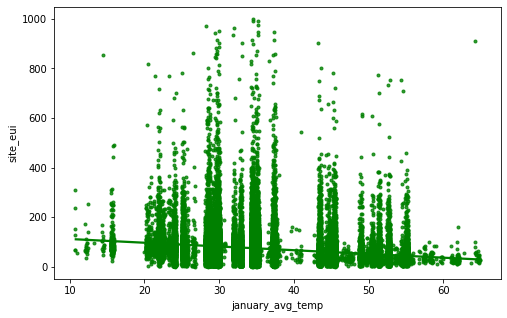

Average january_avg_temp   34.31


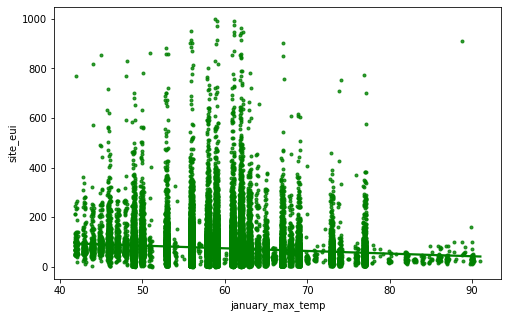

Average january_max_temp   59.05


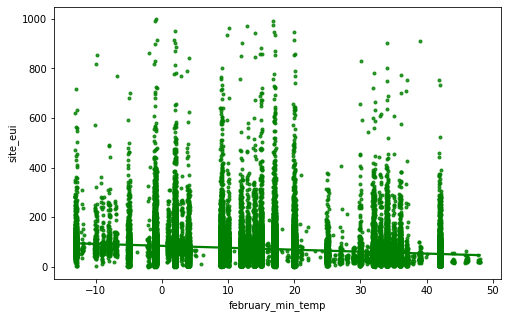

Average february_min_temp   11.72


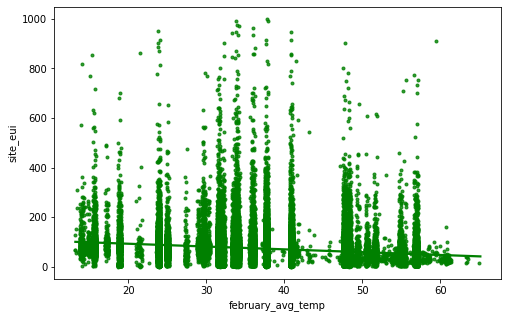

Average february_avg_temp   35.53


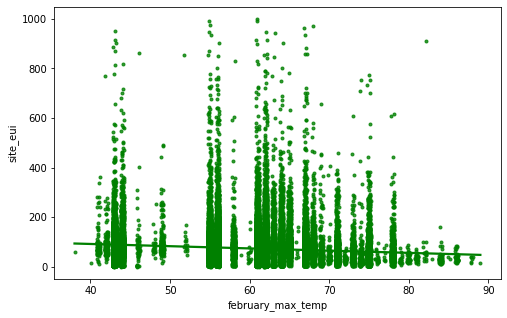

Average february_max_temp   58.49


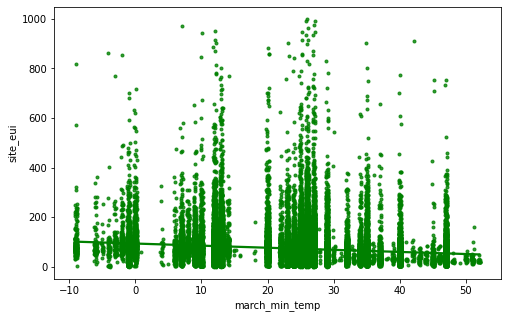

Average march_min_temp   21.61


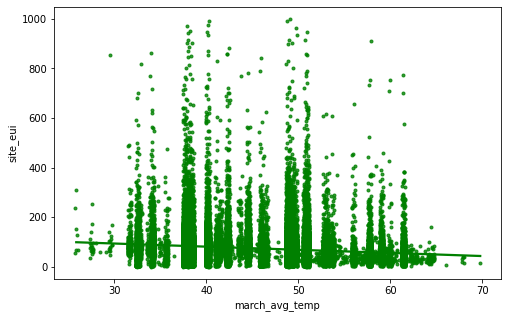

Average march_avg_temp   44.47


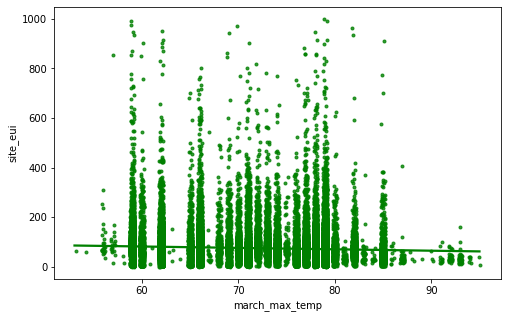

Average march_max_temp   70.9


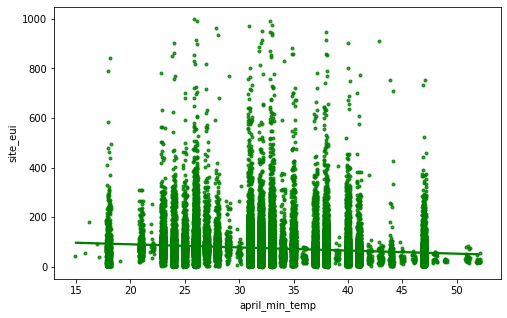

Average april_min_temp   32.04


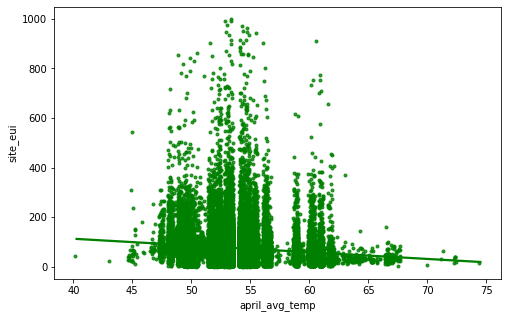

Average april_avg_temp   53.78


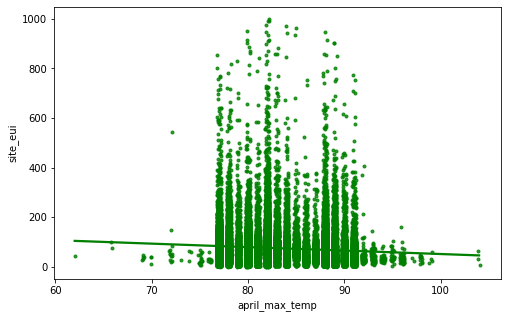

Average april_max_temp   82.66


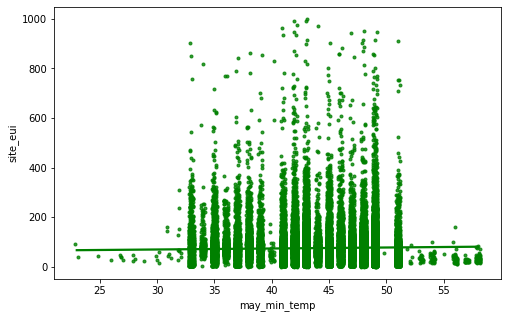

Average may_min_temp   44.71


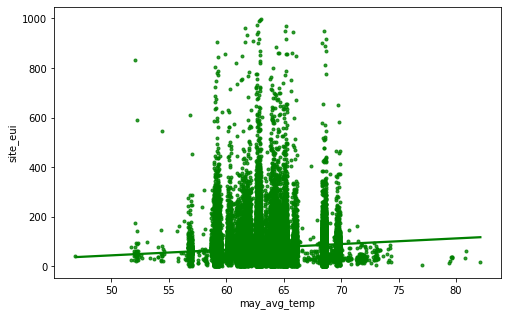

Average may_avg_temp   63.74


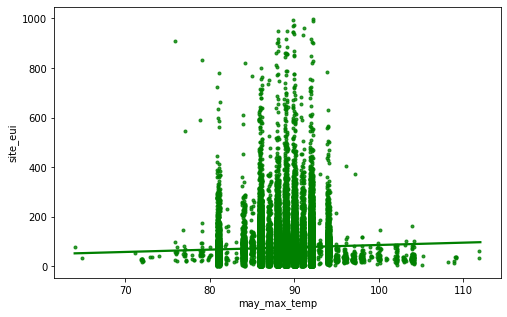

Average may_max_temp   88.99


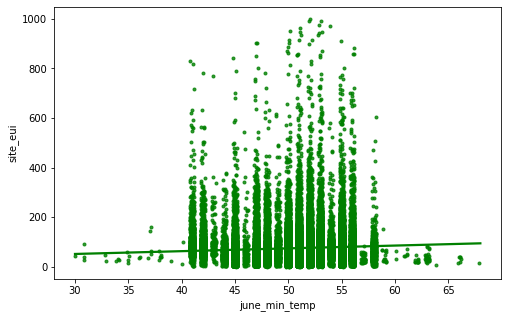

Average june_min_temp   51.13


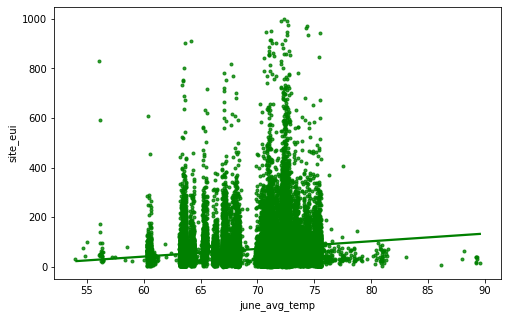

Average june_avg_temp   71.07


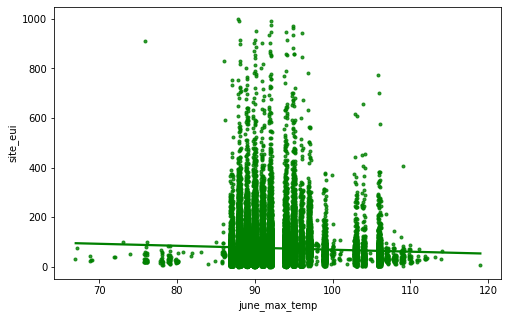

Average june_max_temp   91.4


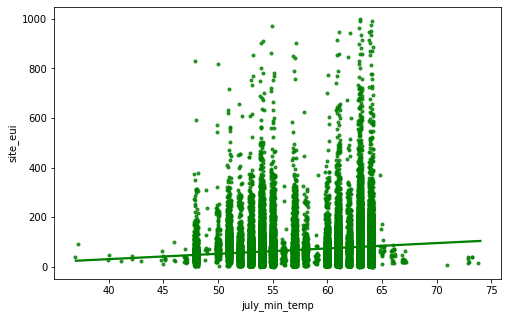

Average july_min_temp   60.57


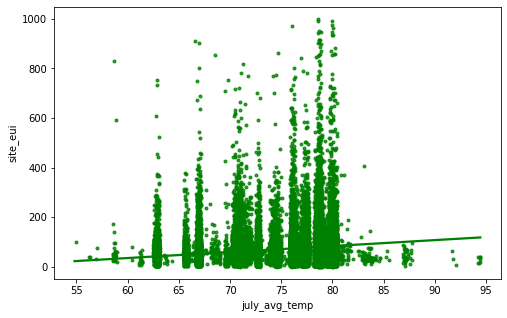

Average july_avg_temp   76.6


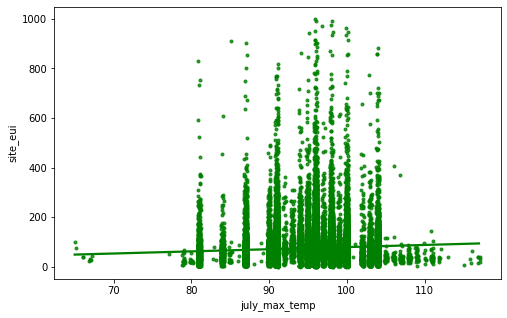

Average july_max_temp   95.54


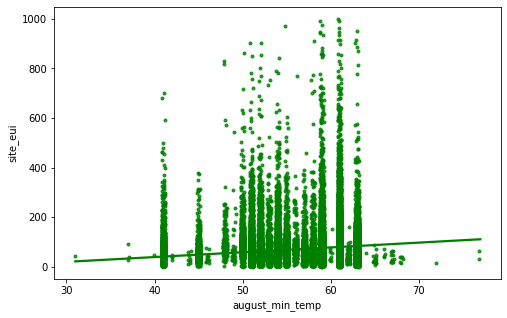

Average august_min_temp   58.52


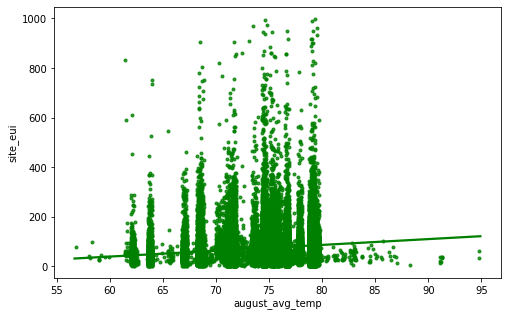

Average august_avg_temp   75.35


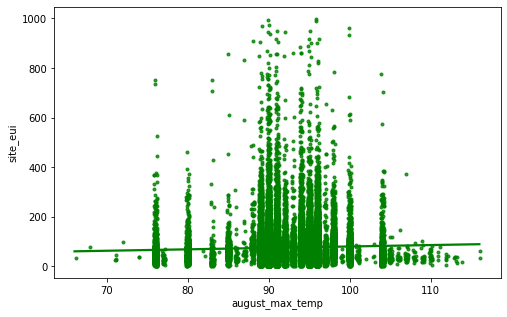

Average august_max_temp   92.57


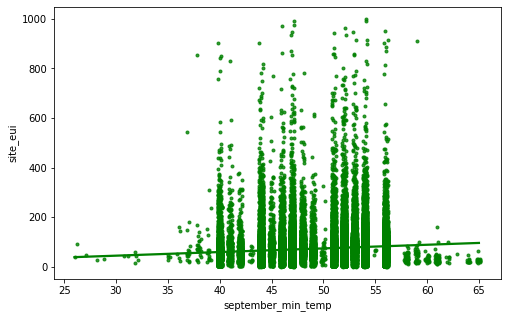

Average september_min_temp   50.79


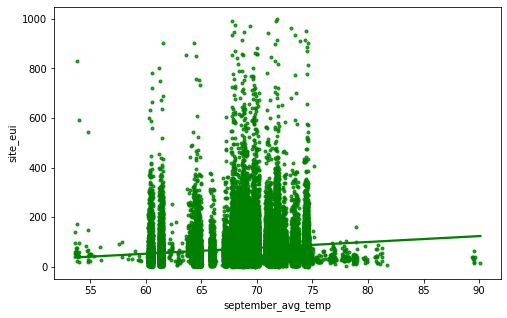

Average september_avg_temp   69.6


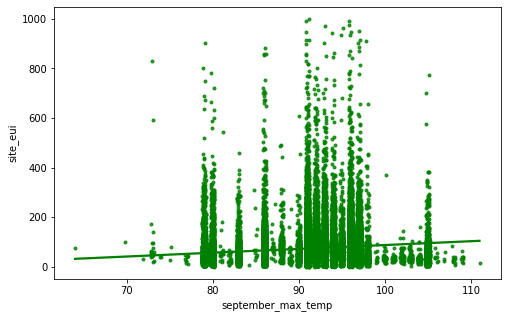

Average september_max_temp   92.17


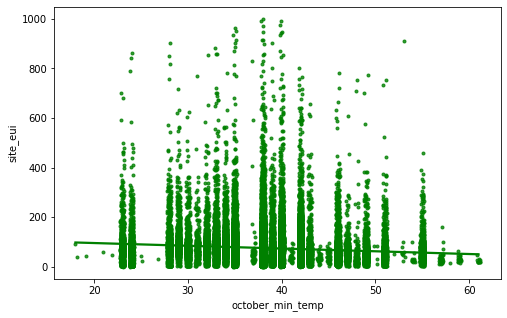

Average october_min_temp   38.21


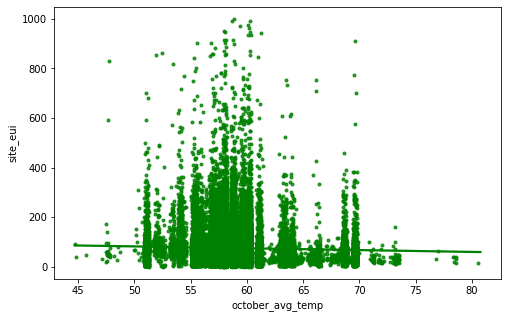

Average october_avg_temp   58.73


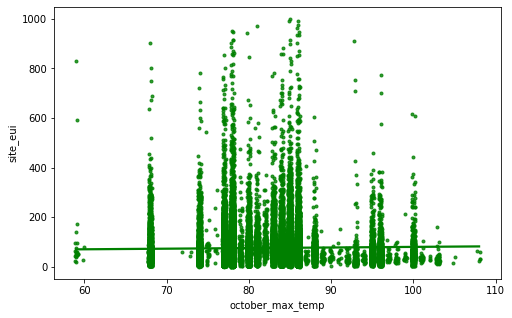

Average october_max_temp   81.14


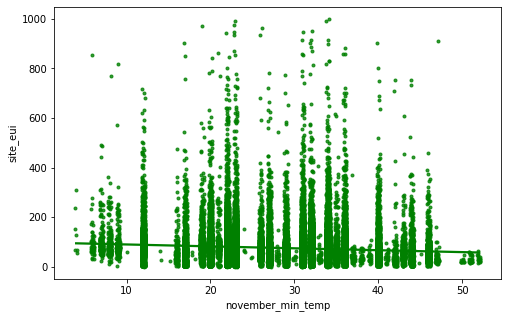

Average november_min_temp   28.63


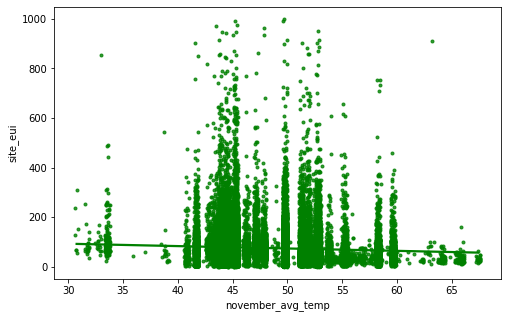

Average november_avg_temp   48.12


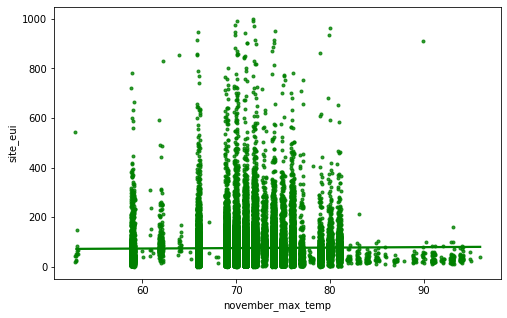

Average november_max_temp   71.2


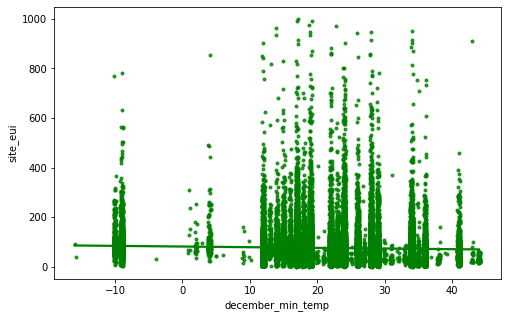

Average december_min_temp   22.74


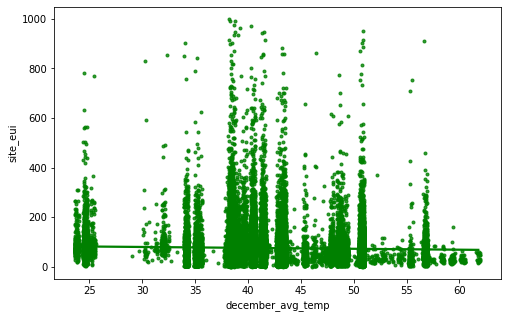

Average december_avg_temp   41.63


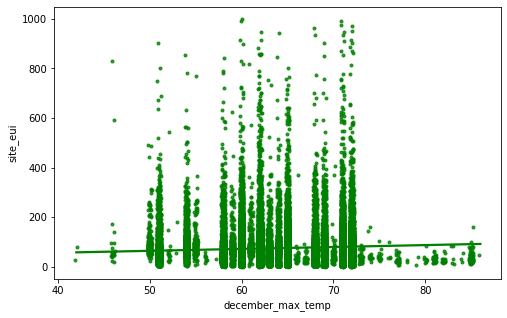

Average december_max_temp   64.5


In [35]:
# display means and scatter plot each temp column with robust regression line (excluding eoi col)
for i in temp_df.iloc[:,:-1]:  
    plt.figure(figsize=(8,5))
    sns.regplot(x=i, y='site_eui', data=temp_df, ci=None, robust=True, x_jitter=.2, marker='.', color='g')
    plt.show()
    print('Average' ,i , ' ', round(temp_df[i].mean(), 2));

Average values may be the most representative for months, so only the monthly average temperature will be used going forward. However, the temperature only seems to have an overall minor influence on energy consumption.  

To simplify the data and deal with correlations between months that are within the same season, the temperature columns will be transformed into seasons (spring, summer, fall, winter) below.

**Cooling days**

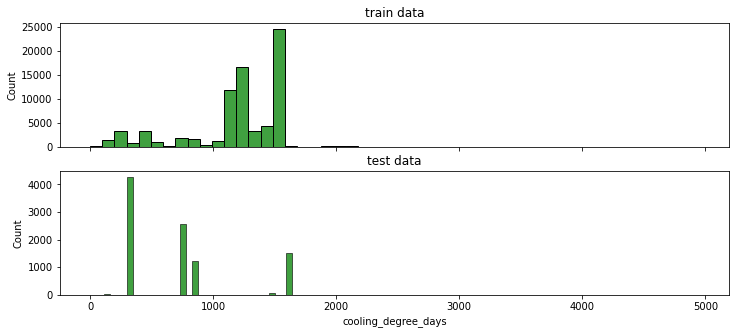

In [36]:
fig,axes = plt.subplots(2,1, figsize=(12,5), sharex=True)
sns.histplot(train, x='cooling_degree_days', ax=axes[0], bins=50, color='g').set_title('train data')
sns.histplot(test, x='cooling_degree_days', ax=axes[1], color='g').set_title('test data');

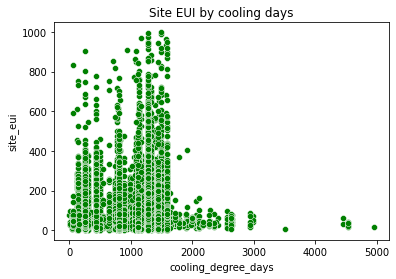

In [37]:
sns.scatterplot(data=train, x='cooling_degree_days', y='site_eui', color='g').set_title('Site EUI by cooling days');

**Heating days**

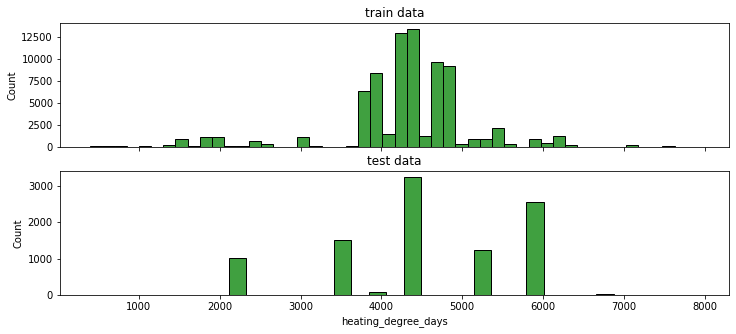

In [38]:
fig,axes = plt.subplots(2,1, figsize=(12,5), sharex=True)
sns.histplot(train, x='heating_degree_days', ax=axes[0], bins=50, color='g').set_title('train data')
sns.histplot(test, x='heating_degree_days', ax=axes[1], color='g').set_title('test data');

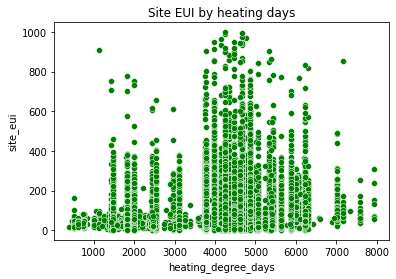

In [39]:
sns.scatterplot(data=train, x='heating_degree_days', y='site_eui', color='g').set_title('Site EUI by heating days');

**Other weather-related data**

In [40]:
PeopleAlwaysTalkAboutTheWeather_count = ['days_below_30f', 'days_below_20f', 'days_below_10f', 'days_below_0f', 
                                         'days_above_80f', 'days_above_90f', 'days_above_100f', 'days_above_110f', 
                                         'days_with_fog']

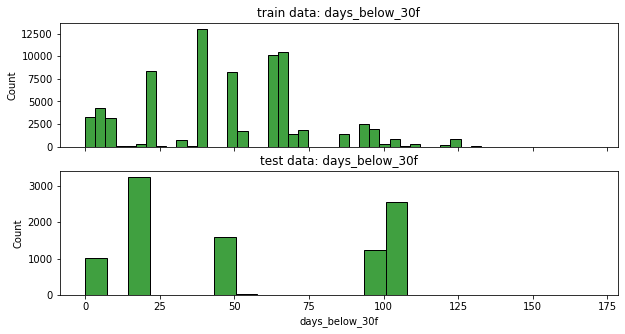

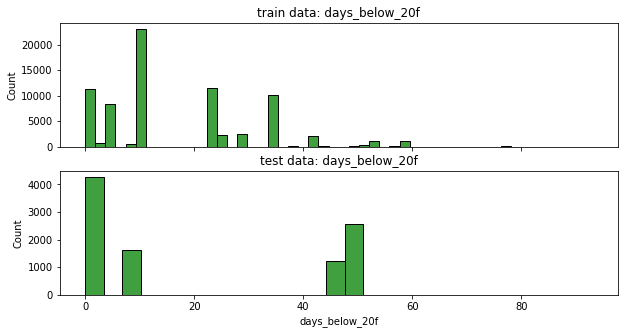

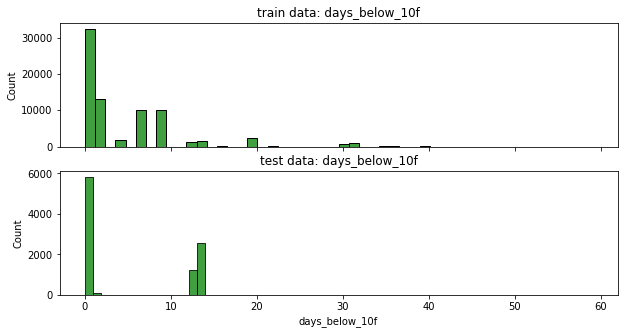

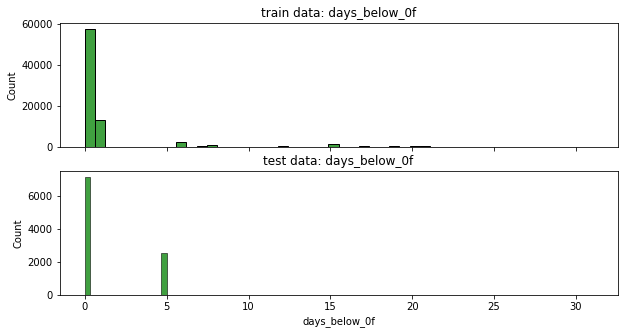

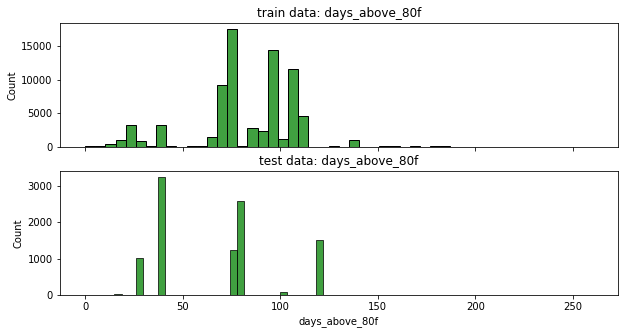

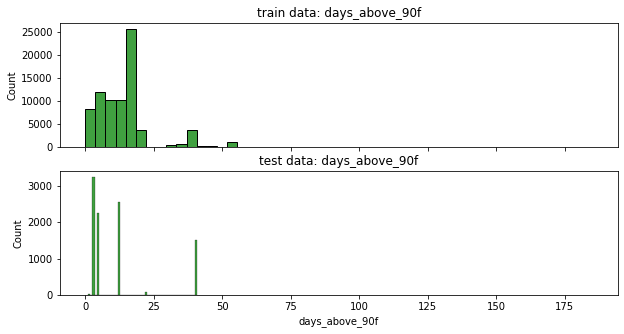

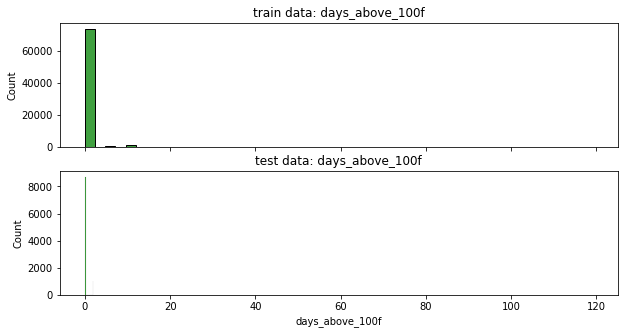

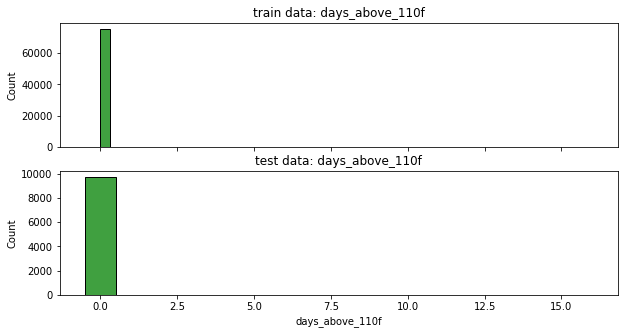

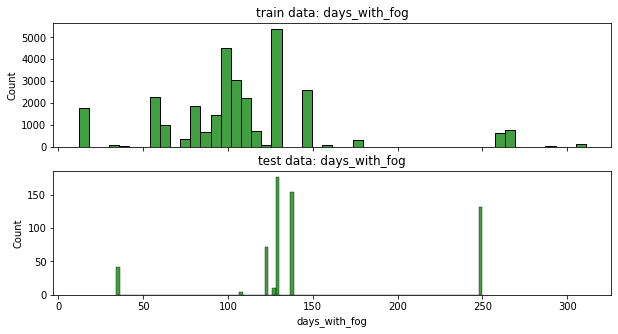

In [41]:
for d in PeopleAlwaysTalkAboutTheWeather_count:
    fig,axes = plt.subplots(2,1, figsize=(10,5), sharex=True)
    sns.histplot(train, x=d, ax=axes[0], bins=50, color='g').set_title('train data: ' + d)
    sns.histplot(test, x=d, ax=axes[1], color='g').set_title('test data: ' + d);
    plt.show()

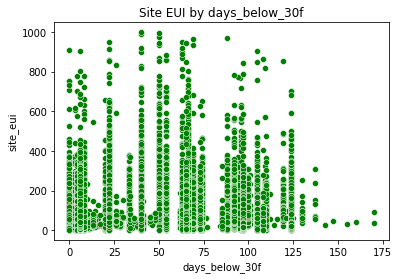

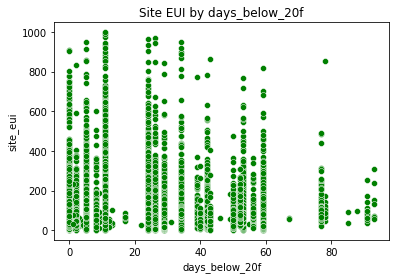

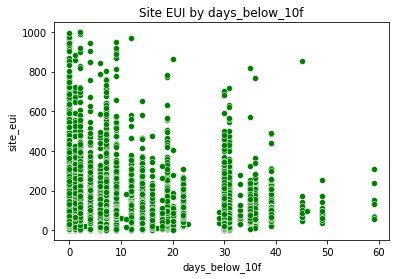

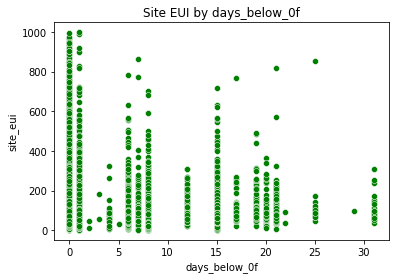

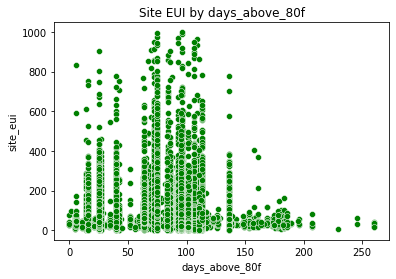

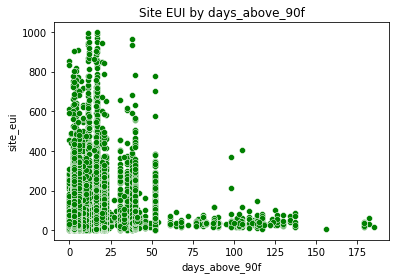

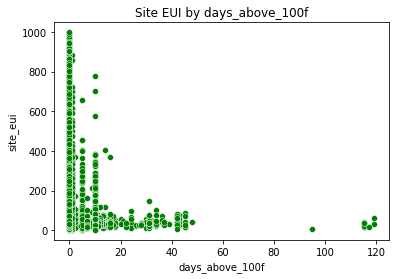

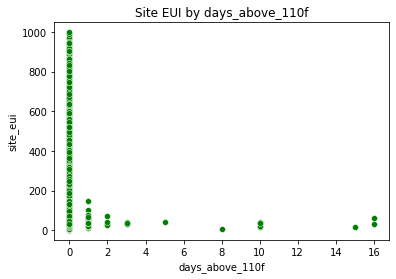

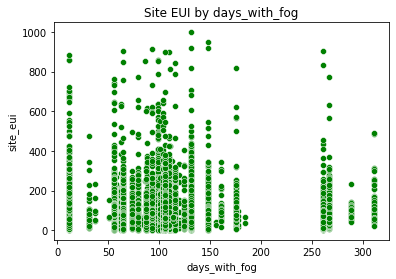

In [42]:
for d in PeopleAlwaysTalkAboutTheWeather_count:
    sns.scatterplot(data=train, x=d, y='site_eui', color='g').set_title('Site EUI by ' + d)
    plt.show()

In [43]:
PeopleAlwaysTalkAboutTheWeather_num = ['precipitation_inches','snowfall_inches', 'snowdepth_inches', 'avg_temp', 
                                       'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed']

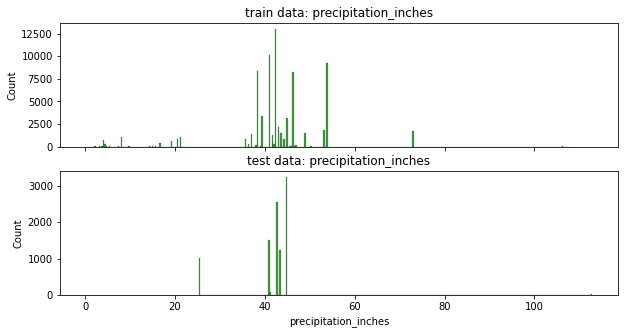

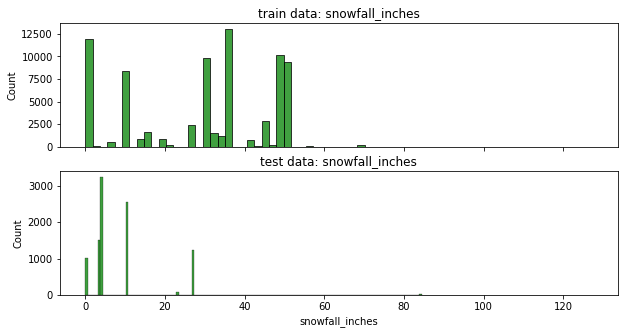

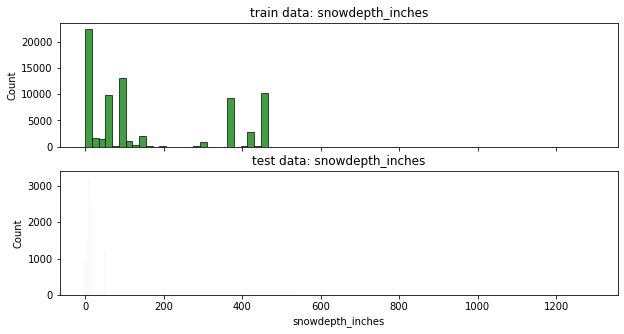

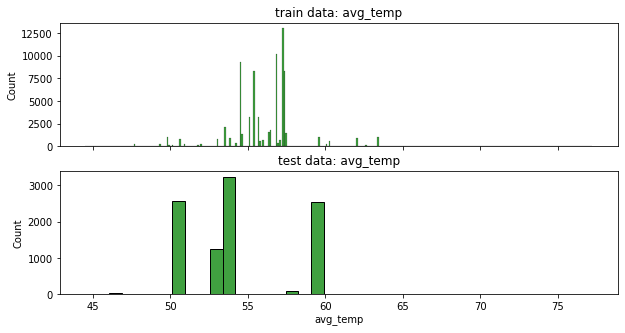

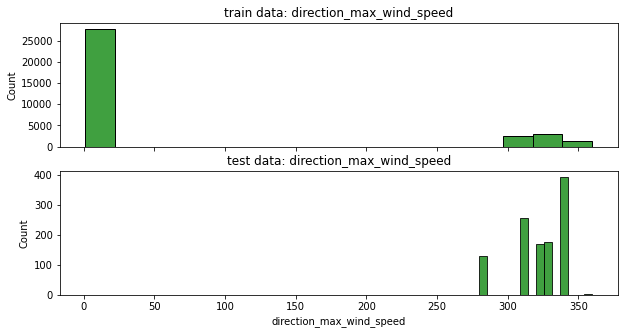

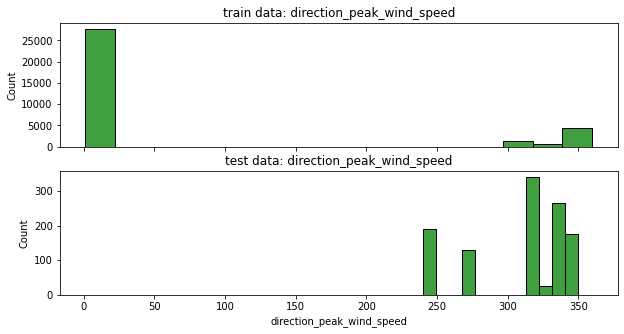

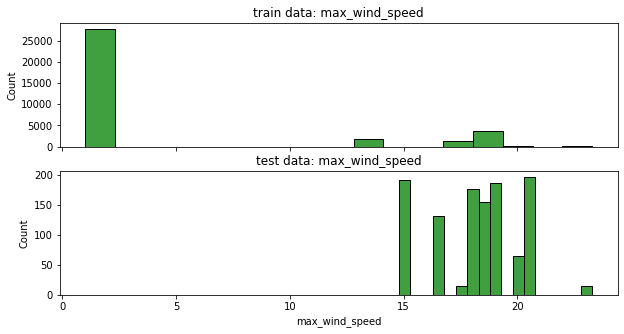

In [44]:
for k in PeopleAlwaysTalkAboutTheWeather_num:
    fig,axes = plt.subplots(2,1, figsize=(10,5), sharex=True)
    sns.histplot(train, x=k, ax=axes[0], color='g').set_title('train data: ' + k)
    sns.histplot(test, x=k, ax=axes[1], color='g').set_title('test data: ' + k);
    plt.show()

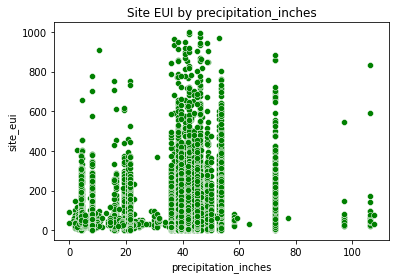

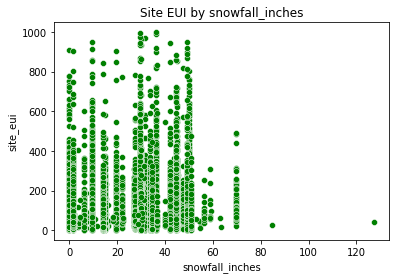

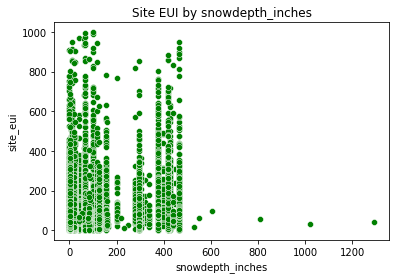

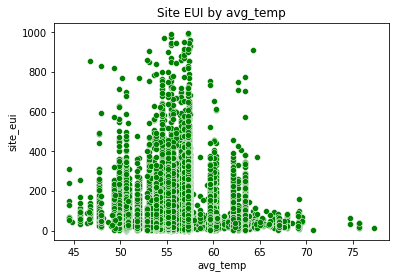

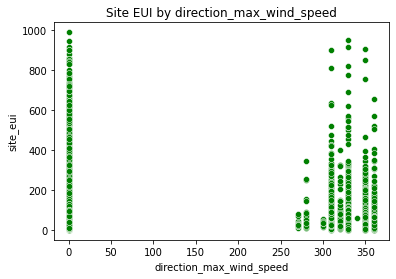

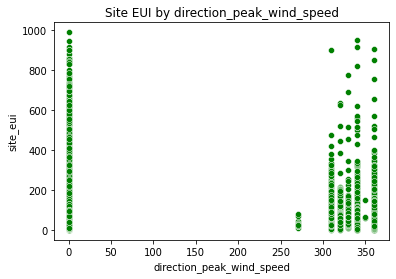

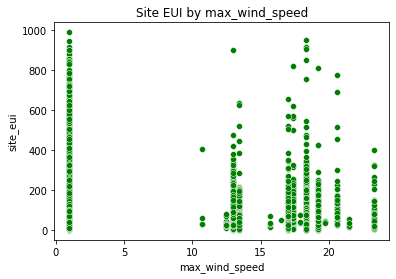

In [45]:
for k in PeopleAlwaysTalkAboutTheWeather_num:
    sns.scatterplot(data=train, x=k, y='site_eui', color='g').set_title('Site EUI by ' + k)
    plt.show()

Average temperature seems to display a sharp decline at around 58F wrt energy consumption. 

Cave: wind speed data and fog days have a lot of missing data.

# **Data pre-processing**

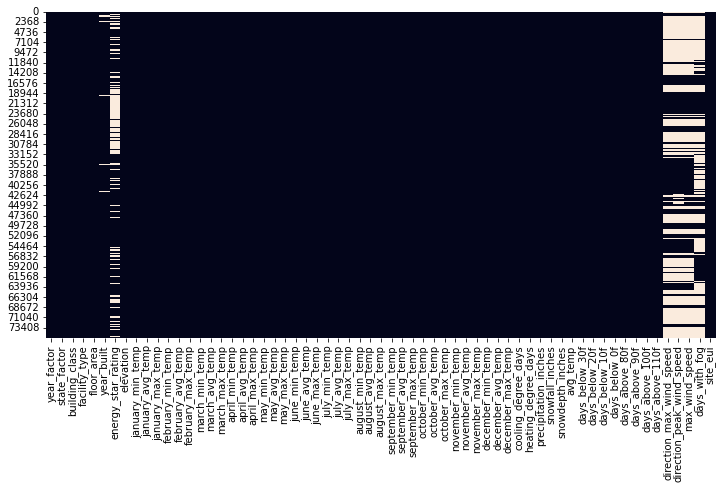

In [46]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), cbar=False);

In [47]:
# columns that contain NA
null_cols = train.loc[:,train.isnull().sum()>0].columns
# create df with NA
null_df = train[null_cols]

print('Train data has {} columns that contain NA (in %):'.format(len(null_cols)))
print(null_df.isnull().sum().sort_values(ascending=False)/len(null_df)*100)

Train data has 6 columns that contain NA (in %):
days_with_fog                60.451179
direction_peak_wind_speed    55.190939
direction_max_wind_speed     54.228652
max_wind_speed               54.228652
energy_star_rating           35.256148
year_built                    2.424858
dtype: float64


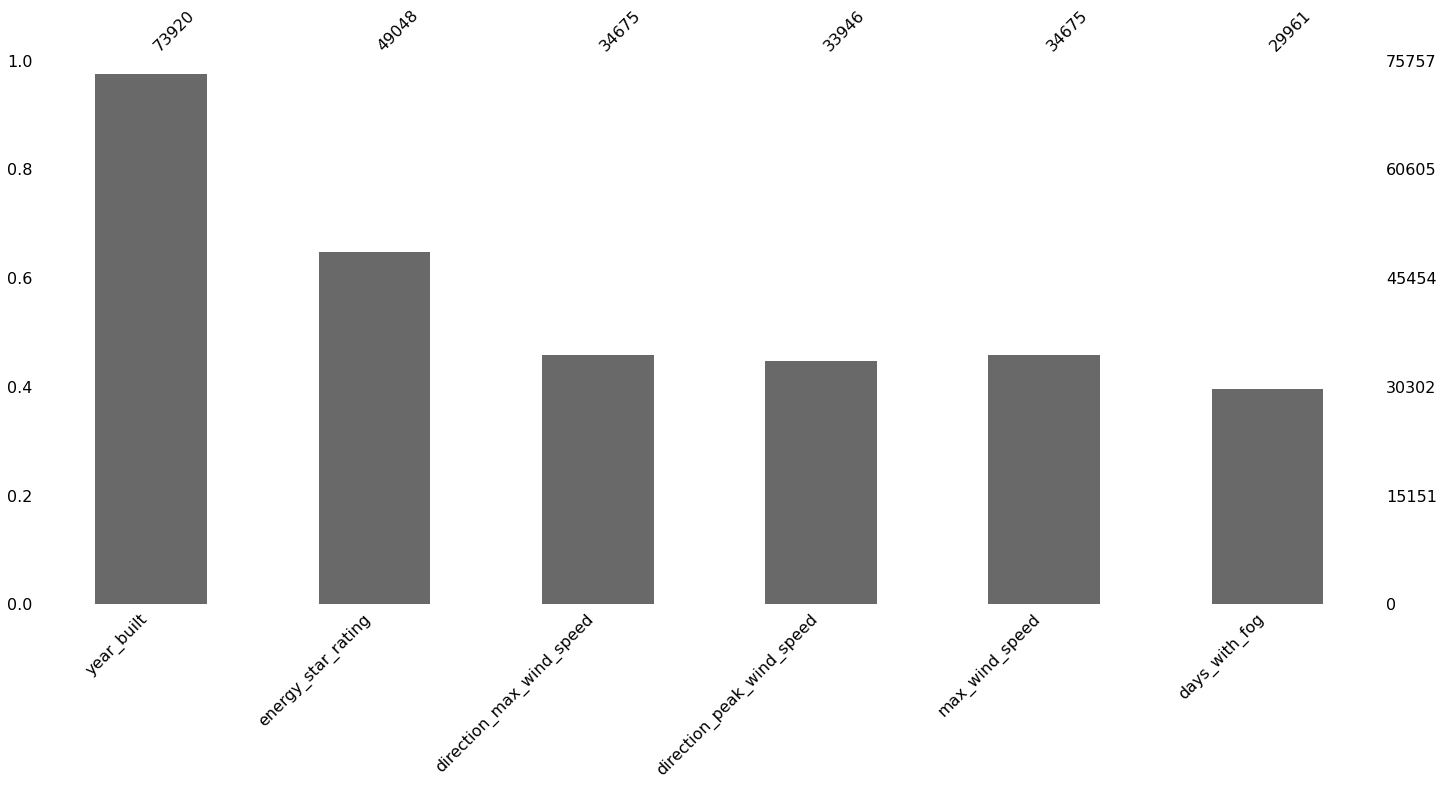

In [48]:
# displays how many data sets are available out of total
msno.bar(null_df);

There are several features where >50% of data points are missing and the given data does not suggest a substantial influence on energy consumption for now (days_with_fog, direction_peak_wind_speed, direction_max_wind_speed and max_wind_speed). 

Will impute missing data points for these features, energy star rating and year built. 

In [49]:
train_df = train.copy()
test_df = test.copy()

**Feature engineering**

Wind and days with fog:

Replace NaN with median

In [50]:
train_df['direction_max_wind_speed'].fillna(train_df['direction_max_wind_speed'].median(), inplace=True)
train_df['direction_peak_wind_speed'].fillna(train_df['direction_peak_wind_speed'].median(), inplace=True)
train_df['max_wind_speed'].fillna(train_df['max_wind_speed'].median(), inplace=True)
train_df['days_with_fog'].fillna(train_df['days_with_fog'].median(), inplace=True)

In [51]:
test_df['direction_max_wind_speed'].fillna(test_df['direction_max_wind_speed'].median(), inplace=True)
test_df['direction_peak_wind_speed'].fillna(test_df['direction_peak_wind_speed'].median(), inplace=True)
test_df['max_wind_speed'].fillna(test_df['max_wind_speed'].median(), inplace=True)
test_df['days_with_fog'].fillna(test_df['days_with_fog'].median(), inplace=True)

Temperature:

To simplify the data and deal with correlations between months that are within the same season, the temperature columns will be transformed into seasons (spring, summer, fall, winter).

In [52]:
train_df['spring'] = (train_df['march_avg_temp'] + train_df['april_avg_temp'] + train_df['may_avg_temp'])/3
train_df['summer'] = (train_df['june_avg_temp'] + train_df['july_avg_temp'] + train_df['august_avg_temp'])/3
train_df['fall'] = (train_df['september_avg_temp'] + train_df['october_avg_temp'] + train_df['november_avg_temp'])/3
train_df['winter'] = (train_df['december_avg_temp'] + train_df['january_avg_temp'] + train_df['february_avg_temp'])/3

In [53]:
# in train dataset, drop monthly temp columns, just keep seasons
train_df.drop([col for col in train_df.loc[:, 'january_min_temp':'december_max_temp'] if '_temp' in col], axis=1, inplace=True)

In [54]:
test_df['spring'] = (test_df['march_avg_temp'] + test_df['april_avg_temp'] + test_df['may_avg_temp'])/3
test_df['summer'] = (test_df['june_avg_temp'] + test_df['july_avg_temp'] + test_df['august_avg_temp'])/3
test_df['fall'] = (test_df['september_avg_temp'] + test_df['october_avg_temp'] + test_df['november_avg_temp'])/3
test_df['winter'] = (test_df['december_avg_temp'] + test_df['january_avg_temp'] + test_df['february_avg_temp'])/3

In [55]:
# in test dataset, drop monthly temp columns, just keep seasons
test_df.drop([col for col in test_df.loc[:, 'january_min_temp':'december_max_temp'] if '_temp' in col], axis=1, inplace=True)

In [56]:
train_df.columns

Index(['year_factor', 'state_factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'elevation',
       'cooling_degree_days', 'heating_degree_days', 'precipitation_inches',
       'snowfall_inches', 'snowdepth_inches', 'avg_temp', 'days_below_30f',
       'days_below_20f', 'days_below_10f', 'days_below_0f', 'days_above_80f',
       'days_above_90f', 'days_above_100f', 'days_above_110f',
       'direction_max_wind_speed', 'direction_peak_wind_speed',
       'max_wind_speed', 'days_with_fog', 'site_eui', 'spring', 'summer',
       'fall', 'winter'],
      dtype='object')

Year built: 

Impute NaN and zeros with median, as these are treated like missing data. 

In [57]:
train_df[train_df['year_built'] == 0]

year_factor state_factor building_class  facility_type  floor_area  \
353             1      State_1     Commercial  Lodging_Hotel    204392.0   
955             2      State_1     Commercial  Lodging_Hotel    204392.0   
2159            3      State_1     Commercial  Lodging_Hotel    204392.0   
3415            4      State_1     Commercial  Lodging_Hotel    204392.0   
4535            5      State_1     Commercial  Lodging_Hotel    204392.0   
5571            6      State_1     Commercial  Lodging_Hotel    204392.0   

      year_built  energy_star_rating  elevation  cooling_degree_days  \
353          0.0                61.0       59.1                  115   
955          0.0                63.0        2.4                  791   
2159         0.0                63.0        9.1                  303   
3415         0.0                68.0        9.1                  497   
4535         0.0                76.0        9.1                 1319   
5571         0.0                78.0       45.7                  142   

      heating_degree_days  precipitation_inches  snowfall_inches  \
353                  2960                 16.59              0.0   
955                  2439                 19.27              0.0   
2159                 3108                  4.16              0.0   
3415                 1477                 20.69              0.0   
4535                 1823                  7.95              0.0   
5571                 2005                 21.39              0.0   

      snowdepth_inches   avg_temp  days_below_30f  days_below_20f  \
353                  0  56.972603               0               0   
955                  0  60.247268               3               0   
2159                 0  57.082192              33               2   
3415                 0  62.067123               0               0   
4535                 0  63.398630               4               0   
5571                 0  59.648907               0               0   

      days_below_10f  days_below_0f  days_above_80f  days_above_90f  \
353                0              0              14               0   
955                0              0             113              35   
2159               0              0              72              10   
3415               0              0              27               6   
4535               0              0             136              52   
5571               0              0              16               2   

      days_above_100f  days_above_110f  direction_max_wind_speed  \
353                 0                0                       1.0   
955                 1                0                       1.0   
2159                0                0                       1.0   
3415                0                0                       1.0   
4535               10                0                       1.0   
5571                0                0                       1.0   

      direction_peak_wind_speed  max_wind_speed  days_with_fog   site_eui  \
353                         1.0             1.0          104.0  82.627179   
955                         1.0             1.0           88.0  87.526794   
2159                        1.0             1.0          104.0  75.362740   
3415                        1.0             1.0          104.0  61.793699   
4535                        1.0             1.0          104.0  59.503653   
5571                        1.0             1.0          104.0  60.833333   

         spring     summer       fall     winter  
353   55.349462  61.795699  60.488710  50.121160  
955   58.761828  70.058065  62.577957  49.508713  
2159  58.025448  66.352509  58.478136  45.340630  
3415  60.872043  66.056452  65.564875  55.587366  
4535  61.763082  74.091219  65.343548  52.257104  
5571  59.691219  63.353226  62.146057  53.434372

In [58]:
test_df[test_df['year_built'] == 0]

year_factor state_factor building_class  facility_type  floor_area  \
7050            7      State_1     Commercial  Lodging_Hotel    204392.0   

      year_built  energy_star_rating  elevation  cooling_degree_days  \
7050         0.0                78.0       18.6                  342   

      heating_degree_days  precipitation_inches  snowfall_inches  \
7050                 2112                 25.24              0.0   

      snowdepth_inches   avg_temp  days_below_30f  days_below_20f  \
7050                 0  59.894521               0               0   

      days_below_10f  days_below_0f  days_above_80f  days_above_90f  \
7050               0              0              29               5   

      days_above_100f  days_above_110f  direction_max_wind_speed  \
7050                2                0                     330.0   

      direction_peak_wind_speed  max_wind_speed  days_with_fog     spring  \
7050                      320.0            18.3          129.0  58.762903   

         summer       fall     winter  
7050  64.420968  64.003405  52.322005

In [59]:
# replace 0
train_df.replace(to_replace=0, value=train_df['year_built'].median(), inplace=True)
test_df.replace(to_replace=0, value=test_df['year_built'].median(), inplace=True)

In [60]:
#replace NaN
train_df['year_built'].fillna(train_df['year_built'].median(), inplace=True)
test_df['year_built'].fillna(test_df['year_built'].median(), inplace=True)

In [61]:
train_df.loc[:, train_df.isna().any()]

energy_star_rating
0                    11.0
1                    45.0
2                    97.0
3                    46.0
4                   100.0
...                   ...
75752                 8.0
75753                98.0
75754                 NaN
75755                 NaN
75756                51.0

[75757 rows x 1 columns]

There is only energy star rating left where missing data is present. 

Energy star rating:

In [62]:
#replace NaN
train_df['energy_star_rating'].fillna(train_df['energy_star_rating'].median(), inplace=True)
test_df['energy_star_rating'].fillna(test_df['energy_star_rating'].median(), inplace=True)

Facility type: 

Using domain knowledge to reduce number of categories.

In [63]:
train_df.facility_type.nunique()

60

In [64]:
train_df.facility_type.value_counts().sort_values(ascending=False) 

Multifamily_Uncategorized                    39455
Office_Uncategorized                         12512
Education_Other_classroom                     3860
Lodging_Hotel                                 2098
2to4_Unit_Building                            1893
Commercial_Other                              1744
5plus_Unit_Building                           1273
Warehouse_Nonrefrigerated                     1255
Retail_Uncategorized                          1130
Education_College_or_university               1056
Nursing_Home                                   772
Education_Uncategorized                        709
Mixed_Use_Commercial_and_Residential           672
Lodging_Dormitory_or_fraternity_sorority       669
Warehouse_Distribution_or_Shipping_center      604
Warehouse_Selfstorage                          577
Grocery_store_or_food_market                   448
Office_Medical_non_diagnostic                  447
Health_Care_Inpatient                          409
Religious_worship              

In [65]:
def eui_per_class(df, col):
    avg_eui = df.groupby(col)['site_eui'].mean()  
    return round(avg_eui, 2)

In [66]:
ft_eui = eui_per_class(train_df, 'facility_type')
ft_eui.sort_values(ascending=False) 

facility_type
Data_Center                                  339.73
Laboratory                                   329.45
Health_Care_Inpatient                        248.34
Grocery_store_or_food_market                 241.14
Food_Service_Restaurant_or_cafeteria         195.59
Health_Care_Outpatient_Uncategorized         189.89
Health_Care_Uncategorized                    183.95
Public_Safety_Penitentiary                   170.90
Public_Assembly_Stadium                      157.04
Service_Vehicle_service_repair_shop          137.60
Food_Sales                                   136.79
Nursing_Home                                 131.31
Public_Safety_Fire_or_police_station         131.12
Food_Service_Uncategorized                   128.80
Public_Assembly_Other                        126.70
Industrial                                   125.35
Lodging_Other                                120.96
Public_Assembly_Entertainment_culture        118.90
Office_Medical_non_diagnostic                116.7

Let's take the facility types with the highest EUI. It seems like several commercial facilities consume most energy. There are several larger drops in EUI, which could be used as a cutoff for included features. We'll use one of those drops and sort all facilities above that as "intense" and sort others into "other commercial use" and "residential use". 

In [67]:
ft_eui.sort_values(ascending=False)[:9]

facility_type
Data_Center                             339.73
Laboratory                              329.45
Health_Care_Inpatient                   248.34
Grocery_store_or_food_market            241.14
Food_Service_Restaurant_or_cafeteria    195.59
Health_Care_Outpatient_Uncategorized    189.89
Health_Care_Uncategorized               183.95
Public_Safety_Penitentiary              170.90
Public_Assembly_Stadium                 157.04
Name: site_eui, dtype: float64

In [68]:
# mean site eui
print(round(train_df['site_eui'].mean(), 2))
print(round(train_df['site_eui'].median(), 2))

82.58
75.29


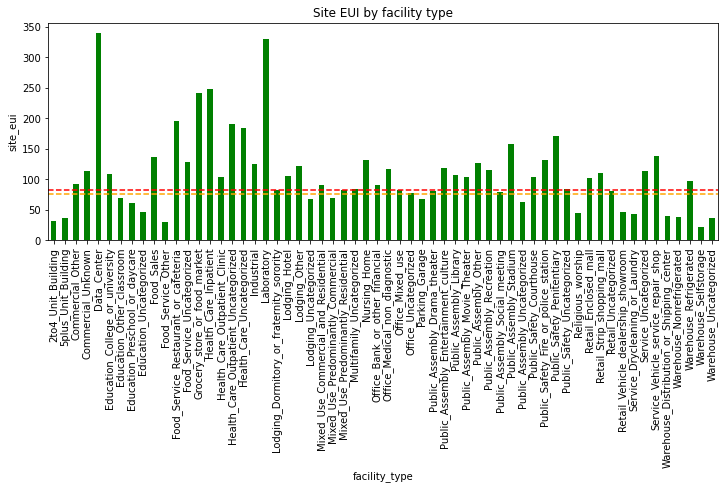

In [69]:
ft_eui.plot(x='facility_type', figsize=(12, 4), kind='bar', color='g')
plt.axhline(y=train_df['site_eui'].mean(), color='r', linestyle='--')
plt.axhline(y=train_df['site_eui'].median(), color='orange', linestyle='--')  
plt.ylabel('site_eui')
plt.title('Site EUI by facility type');

In [70]:
# adapted from: https://www.kaggle.com/angiengkh/wids-2022-eda-feature-engineering/notebook
def facility_type_group(ft):
    if (ft['building_class'] == 'Residential'):
        return 'Residential'
    elif (ft['facility_type'] in ('Data_Center', 'Laboratory', 'Grocery_store_or_food_market', 'Health_Care_Inpatient', 
                                  'Health_Care_Uncategorized', 'Health_Care_Outpatient_Uncategorized', 'Food_Service_Restaurant_or_cafeteria',
                                  'Public_Safety_Penitentiary' , 'Public_Assembly_Stadium')):
        return 'Commercial_intense'
    else:
        return 'Commercial_others'

In [71]:
train_df['facility_type_group'] = train.apply(facility_type_group, axis=1)
test_df['facility_type_group'] = test.apply(facility_type_group, axis=1)

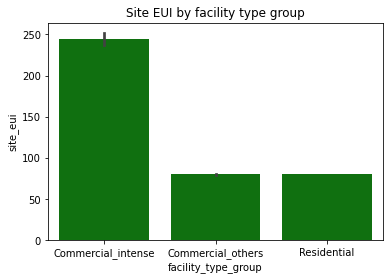

In [72]:
sns.barplot(data=train_df, x='facility_type_group', y='site_eui', color='g').set_title('Site EUI by facility type group');

In [73]:
round( train_df.groupby(['facility_type_group'])['site_eui'].mean(), 2) 

facility_type_group
Commercial_intense    244.53
Commercial_others      79.67
Residential            80.24
Name: site_eui, dtype: float64

Having identified the facility type that has the highest energy consumption in 'Commercial_intense', we see that other commercial and residential categories have similar amounts of EUI. 

In [74]:
train_df.facility_type_group.value_counts().sort_values(ascending=False) 

Residential           43558
Commercial_others     31011
Commercial_intense     1188
Name: facility_type_group, dtype: int64

In [75]:
# drop old facility type column, just keep facility type group
train_df.drop('facility_type', axis=1, inplace=True)
test_df.drop('facility_type', axis=1, inplace=True)

**Encoding categorical data**

In [76]:
train_df.select_dtypes(include=['object']).dtypes

state_factor           object
building_class         object
facility_type_group    object
dtype: object

In [77]:
# One-Hot Encoding categorical features
dummies = ['state_factor', 'building_class', 'facility_type_group']
train_coded = pd.get_dummies(train_df, columns = dummies, drop_first=True)

In [78]:
test_df.select_dtypes(include=['object']).dtypes

state_factor           object
building_class         object
facility_type_group    object
dtype: object

In [79]:
# One-Hot Encoding categorical features
dummies = ['state_factor', 'building_class', 'facility_type_group']
test_coded = pd.get_dummies(test_df, columns = dummies, drop_first=True)

In [80]:
# also, add one state factor with all 0, as it's missing in the test file and therefore not OHE correctly (feature numbers are different otherwise)
test_coded['state_factor_State_6'] = 0

# **Model Creation and Evaluation**

In [81]:
train_coded

year_factor  floor_area  year_built  energy_star_rating  elevation  \
0                1     61242.0      1942.0                11.0        2.4   
1                1    274000.0      1955.0                45.0        1.8   
2                1    280025.0      1951.0                97.0        1.8   
3                1     55325.0      1980.0                46.0        1.8   
4                1     66000.0      1985.0               100.0        2.4   
...            ...         ...         ...                 ...        ...   
75752            6     20410.0      1995.0                 8.0       36.6   
75753            6     40489.0      1910.0                98.0       36.6   
75754            6     28072.0      1917.0                67.0       36.6   
75755            6     53575.0      2012.0                67.0       36.6   
75756            6     23888.0      1974.0                51.0       36.6   

       cooling_degree_days  heating_degree_days  precipitation_inches  \
0                      115                 2960                 16.59   
1                      115                 2960                 16.59   
2                      115                 2960                 16.59   
3                      115                 2960                 16.59   
4                      115                 2960                 16.59   
...                    ...                  ...                   ...   
75752                  260                 3772                 45.03   
75753                  260                 3772                 45.03   
75754                   55                 6218                106.32   
75755                   55                 6218                106.32   
75756                  148                 5853                107.69   

       snowfall_inches  snowdepth_inches   avg_temp  days_below_30f  \
0               1951.0              1951  56.972603            1951   
1               1951.0              1951  56.972603            1951   
2               1951.0              1951  56.972603            1951   
3               1951.0              1951  56.972603            1951   
4               1951.0              1951  56.972603            1951   
...                ...               ...        ...             ...   
75752              1.4                 1  55.147541               6   
75753              1.4                 1  55.147541               6   
75754             36.6               438  47.911202              26   
75755             36.6               438  47.911202              26   
75756             28.8               377  49.127397              17   

       days_below_20f  days_below_10f  days_below_0f  days_above_80f  \
0                1951            1951           1951              14   
1                1951            1951           1951              14   
2                1951            1951           1951              14   
3                1951            1951           1951              14   
4                1951            1951           1951              14   
...               ...             ...            ...             ...   
75752            1951            1951           1951              25   
75753            1951            1951           1951              25   
75754               2            1951           1951               6   
75755               2            1951           1951               6   
75756               1            1951           1951              16   

       days_above_90f  days_above_100f  days_above_110f  \
0                1951             1951             1951   
1                1951             1951             1951   
2                1951             1951             1951   
3                1951             1951             1951   
4                1951             1951             1951   
...               ...              ...              ...   
75752               3             1951             1951   
75753          

In [82]:
y = train_coded['site_eui']
X = train_coded.drop('site_eui', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

The evaluation metric for this competition is Root Mean Squared Error (RMSE).

In [83]:
def fit_evaluate(clf, X_train, X_test, y_train, y_test):
    '''
    Generic function that fits the model to the training data,
    makes predictions for the test data and prints the evaluation
    criterion RMSE. Finally, it prints expected vs predicted values
    and the residuals. 
    '''
    
    # fit model to training data
    clf.fit(X_train, y_train, eval_metric='rmse') 
    print(clf, '\n')
    
    # make predictions for test data
    y_pred = clf.predict(X_test)
        
    # print evaluation   
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('RMSE on test set: {:.4f}'.format(rmse))
        
    # plot predicted vs expected values
    plt.scatter(y_test, y_pred)   
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y');
        
    # plot residuals
    sns.displot((y_test-y_pred), bins=50, kde=True)  
    plt.title('Residuals');

I will test two models: i) eXtreme Gradient Boosting Regressor aka XGBRegressor: it's an ensemble learning method basing the final model on a combination of several weak models, and ii) Light Gradient Boosting Model aka LGBMRegressor: a gradient boosting model that uses tree-based learning algorithms.

* XGB regressor * 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) 

RMSE on test set: 43.2934


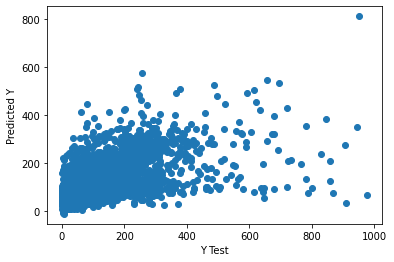

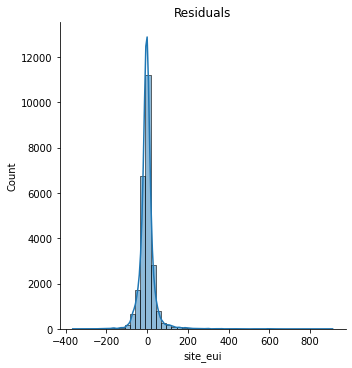

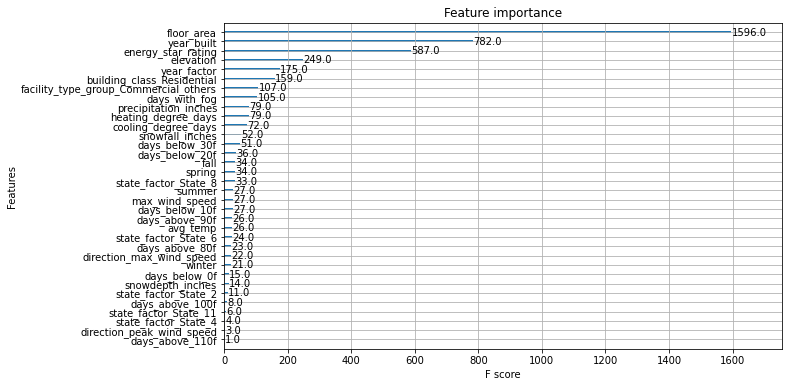

In [84]:
modelXGB = XGBRegressor()
print('* XGB regressor * \n')
fit_evaluate(modelXGB, X_train, X_test, y_train, y_test);

fig, ax = plt.subplots(figsize=(10,6))
plot_importance(modelXGB, ax=ax);

In [85]:
def paramTuningXGB(X_train, y_train):
    params = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [2, 4, 6],
        'min_child_weight': [1, 3],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [50, 100, 200]
    }

    gridsearch = GridSearchCV(estimator=modelXGB, param_grid=params, cv=5, verbose=1)
    gridsearch.fit(X_train,y_train)

    print(gridsearch.best_params_)
    print(gridsearch.best_score_)

Hyperparameter tuning for modelXGB:

In [86]:
#paramTuningXGB(X_train, y_train)

Rerun model with tuned parameters:

* Tuned XGB regressor * 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None) 

RMSE on test set: 43.3702


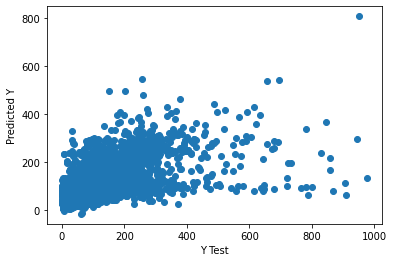

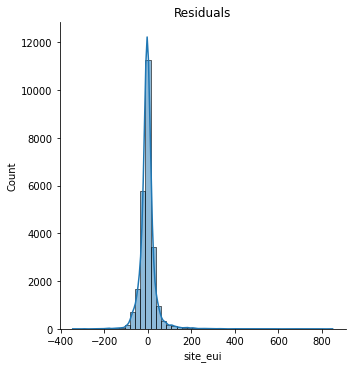

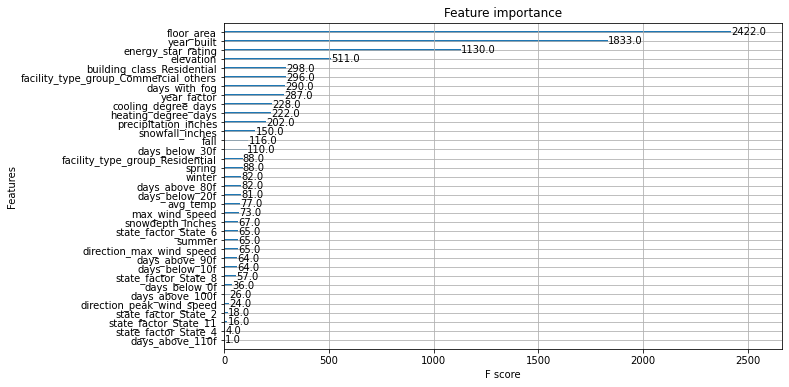

In [87]:
print('* Tuned XGB regressor * \n')
tuned_params = {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.7}

modelXGB_tuned = XGBRegressor(**tuned_params)

fit_evaluate(modelXGB_tuned, X_train, X_test, y_train, y_test);

fig, ax = plt.subplots(figsize=(10,6))
plot_importance(modelXGB_tuned, ax=ax);

Parameter tuning did not improve the model. Overall, it seems like floor_area, energy_star_rating and year_built have the biggest impact. 

* LGBM regressor * 

LGBMRegressor() 

RMSE on test set: 43.8797


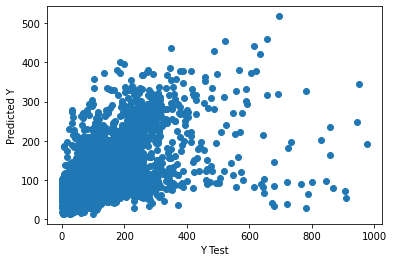

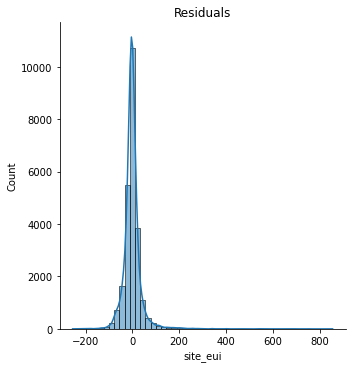

In [88]:
modelLGBM = LGBMRegressor()
print('* LGBM regressor * \n')
fit_evaluate(modelLGBM, X_train, X_test, y_train, y_test)

Parameter tuning for LGBMRegressor:

In [89]:
from scipy.stats import randint as sp_randint

params ={'n_estimators': sp_randint(20, 200),
         'learning_rate': [0.0001, 0.001, 0.01, 0.1],
         'num_leaves': sp_randint(10, 100), 
         'max_depth': sp_randint(5, 50)}

In [90]:
randsearch = RandomizedSearchCV(
    estimator=modelLGBM, 
    param_distributions=params, 
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    cv=3,
    refit=True,
    verbose=True)

randsearch.fit(X_train, y_train)

print(randsearch.best_params_)
print(randsearch.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.2min finished


{'learning_rate': 0.1, 'max_depth': 38, 'n_estimators': 163, 'num_leaves': 86}
-45.79838446718002


* Tuned LGBM regressor * 

LGBMRegressor(max_depth=29, n_estimators=168, num_leaves=90) 

RMSE on test set: 43.0652


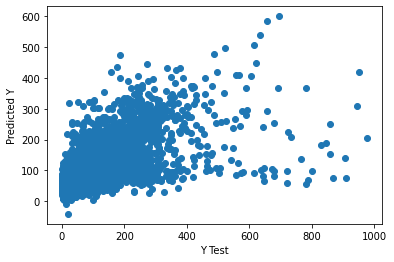

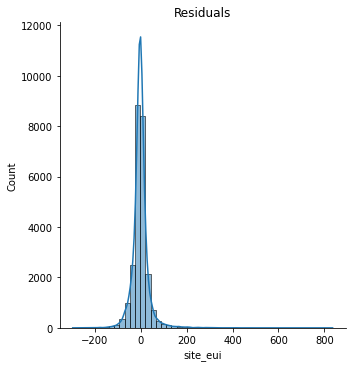

In [91]:
print('* Tuned LGBM regressor * \n')
tuned_params = {'learning_rate': 0.1, 'max_depth': 29, 'n_estimators': 168, 'num_leaves': 90} 
modelLGBM_tuned = LGBMRegressor(**tuned_params)

fit_evaluate(modelLGBM_tuned, X_train, X_test, y_train, y_test);

The tuned LGBM regressors performed best so far. 

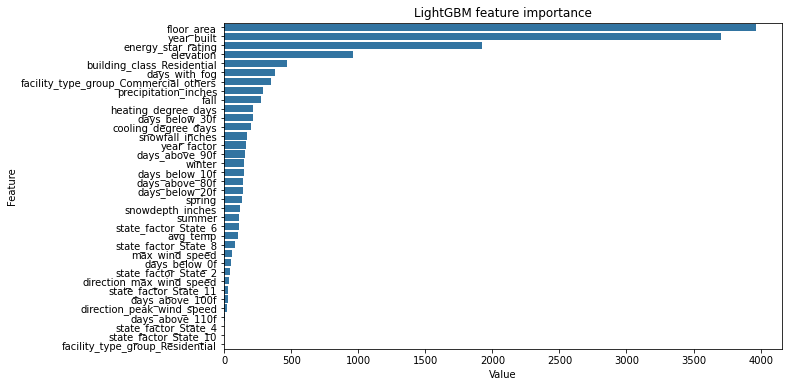

In [92]:
feature_imp = pd.DataFrame({'Value': modelLGBM_tuned.feature_importances_,'Feature': X.columns})

plt.figure(figsize=(10,6))
sns.barplot(x='Value', y='Feature', data=feature_imp.sort_values(by='Value', ascending=False), color='#1f77b4')
plt.title('LightGBM feature importance');

Similar as before, the most influential features are floor_area, year_built and energy_star_rating. 

**Prepare submission file**

Use best model to make predictions. 

In [93]:
final_pred = modelLGBM_tuned.predict(test_coded)

For every building (i.e. row) in the test dataset (test.csv), submission files should contain two columns: id and site_eui. id should be an integer and site_eui should be a real value. For each row, these two values should be separated by a comma.

In [94]:
results = test_id.copy()

In [95]:
results['site_eui'] = final_pred.tolist()

In [96]:
results.head()

id    site_eui
0  75757  248.845714
1  75758  195.263629
2  75759  329.922131
3  75760  266.332361
4  75761  286.163283

In [97]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        9705 non-null   int64  
 1   site_eui  9705 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 151.8 KB


In [98]:
results.to_csv('submission.csv', index=False, header=True)